In [1]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]


# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

m0_scale    = 14
m0_min      = 3.6
m0_max      = 14.8
mtrue_bins = np.arange(m0_min, m0_max, .4)
mae_min  =0
mae_max  = 10.5
mae_bins = np.arange(mae_min, mae_max, .5)
mre_bins = np.arange(0, 1.05, .05)
mass_bins = np.arange(3600,14000,400)/1000.

out_dir='plots'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = True

##------m1.2to17.2  -----------

In [2]:
###----------------m1To17p2_13channel_v2_[8,16,32,64]-------------------------------------------

In [3]:
#ls gpuscratch/mass_reg_with_modified_mass_scale/13_channels_massregressor_ResNet_3/INFERENCE_DATA/

In [4]:
local='/uscms/home/bbbam/nobackup/mass_reg_with_modified_mass_scale'
rhFileList = '%s/*.pkl'%(local)
paths = glob.glob(rhFileList)
assert len(paths) > 0
print(f"{len(paths)} files found")

5 files found


In [10]:
epoch=5

data_file = paths[epoch-1]
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
mae_ = data["mae"]
mre_ = data["mre"]

loaded data file ------>  /uscms/home/bbbam/nobackup/mass_reg_with_modified_mass_scale/epoch0__mae2.0902_inference_data.pkl


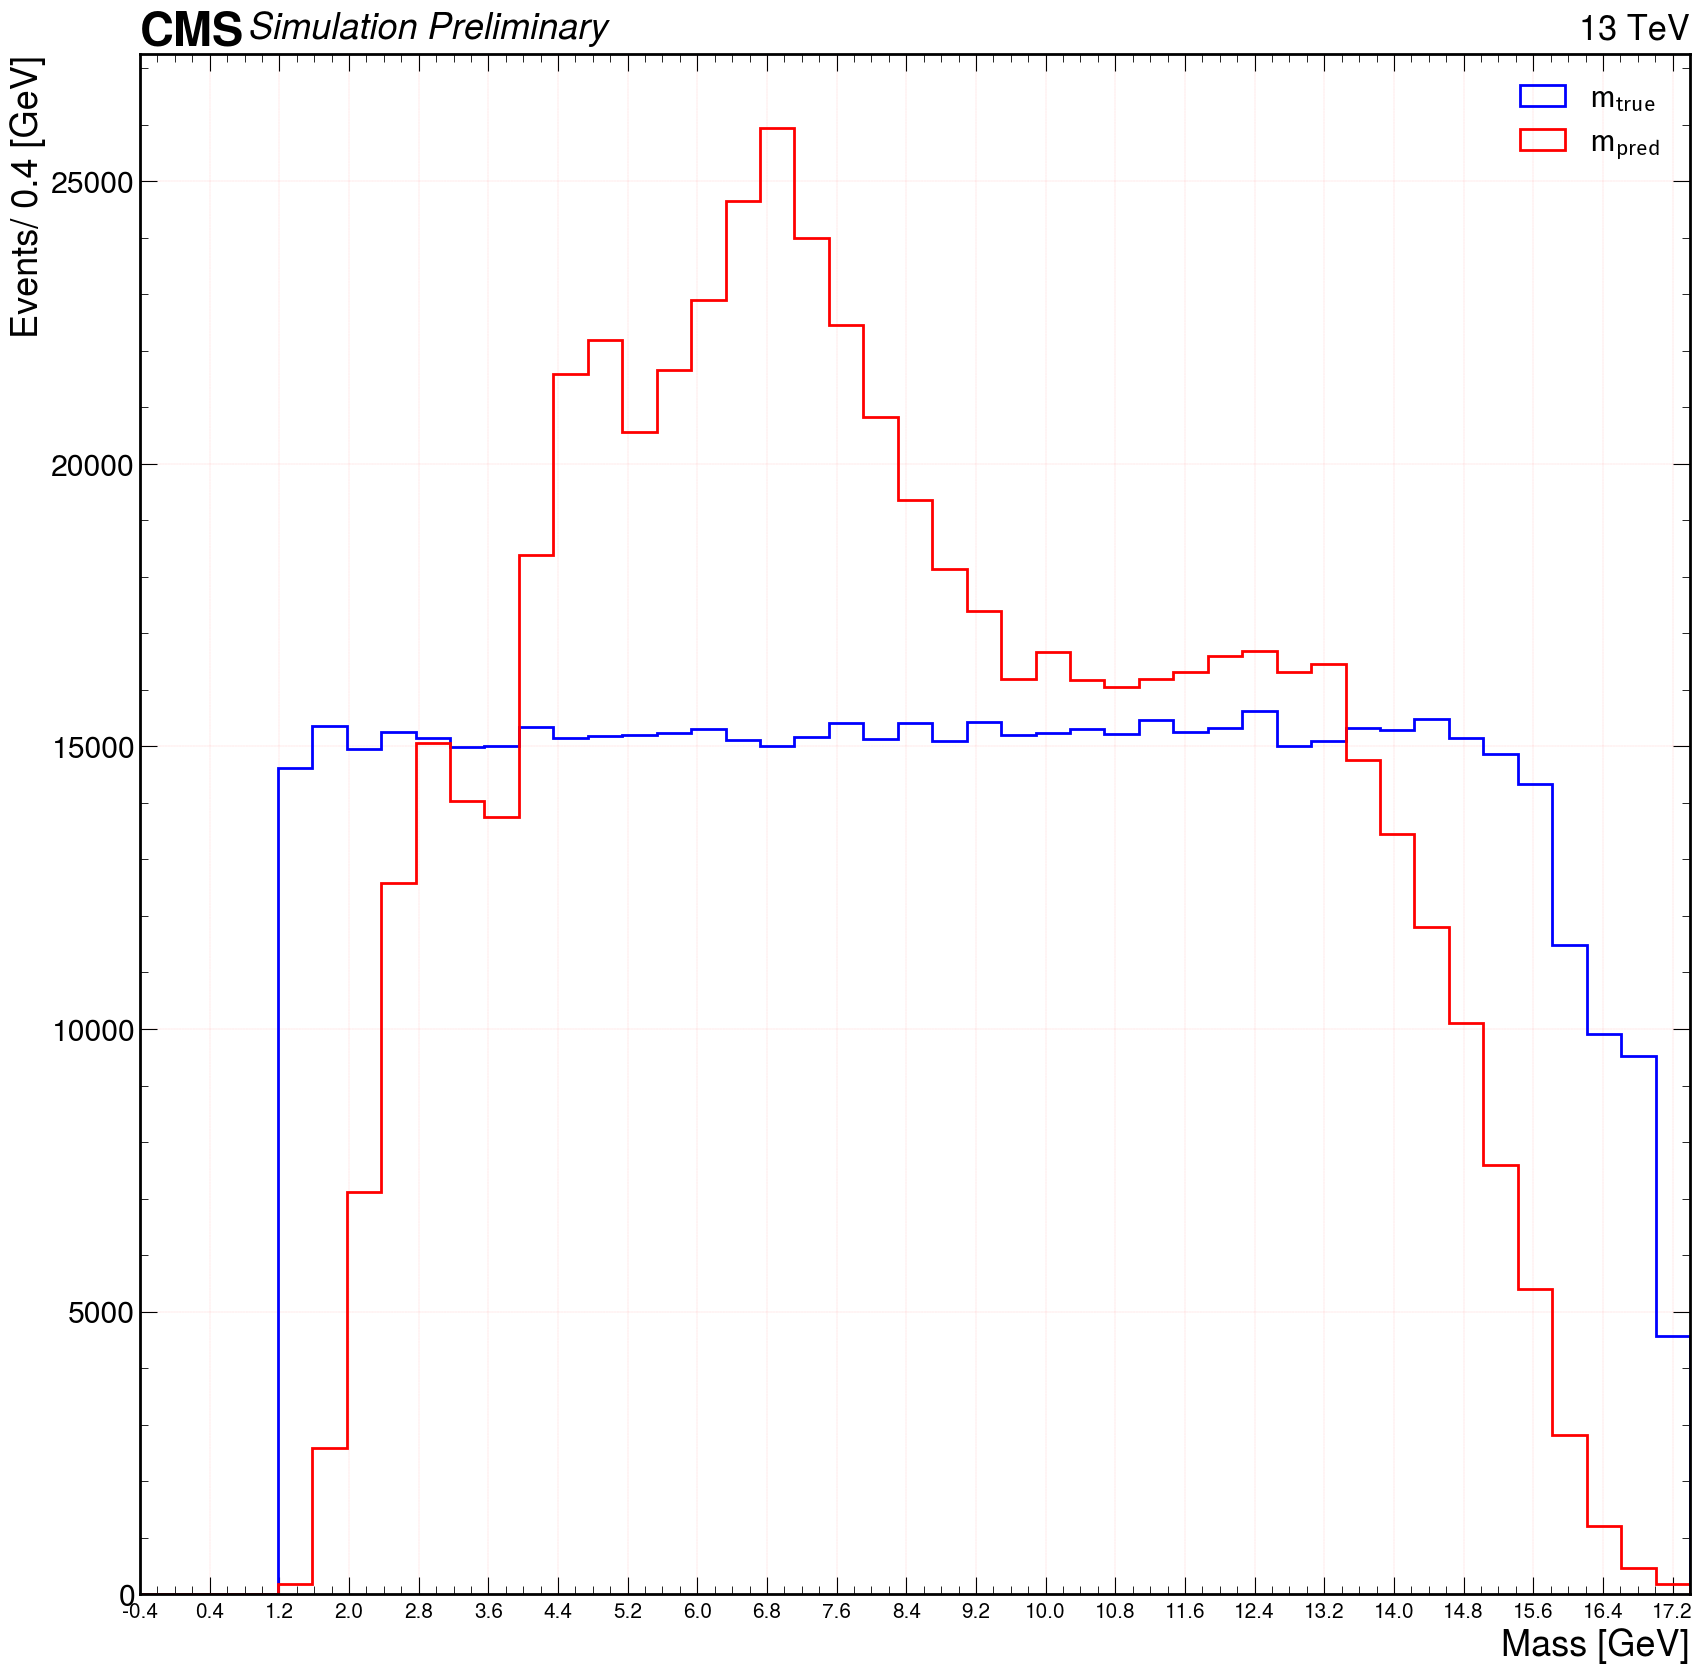

In [11]:
# Check 1D m_pred
# Extebded version
m0_min = 0.8
m0_max = 16.2
bin_size = 0.4
fig, ax = plt.subplots(figsize=(20,20))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# # Truncated version
# fig, ax = plt.subplots(figsize=(20,20))
# plt.hist(m_true_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
# plt.hist(m_pred_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
# plt.xlim(m0_min-bin_size,m0_max+bin_size)
# plt.xticks(np.arange(m0_min,m0_max+bin_size,bin_size),size=15)
# plt.grid(color='r', linestyle='--', linewidth=.1)
# plt.xlabel('Mass [GeV]')
# plt.ylabel('Events/ 0.4 [GeV]' )
# # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses', size=25)
# plt.legend(loc='upper right')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# # plt.savefig('%s/%d_mtru_mpred_hist_truncate.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
# plt.show()

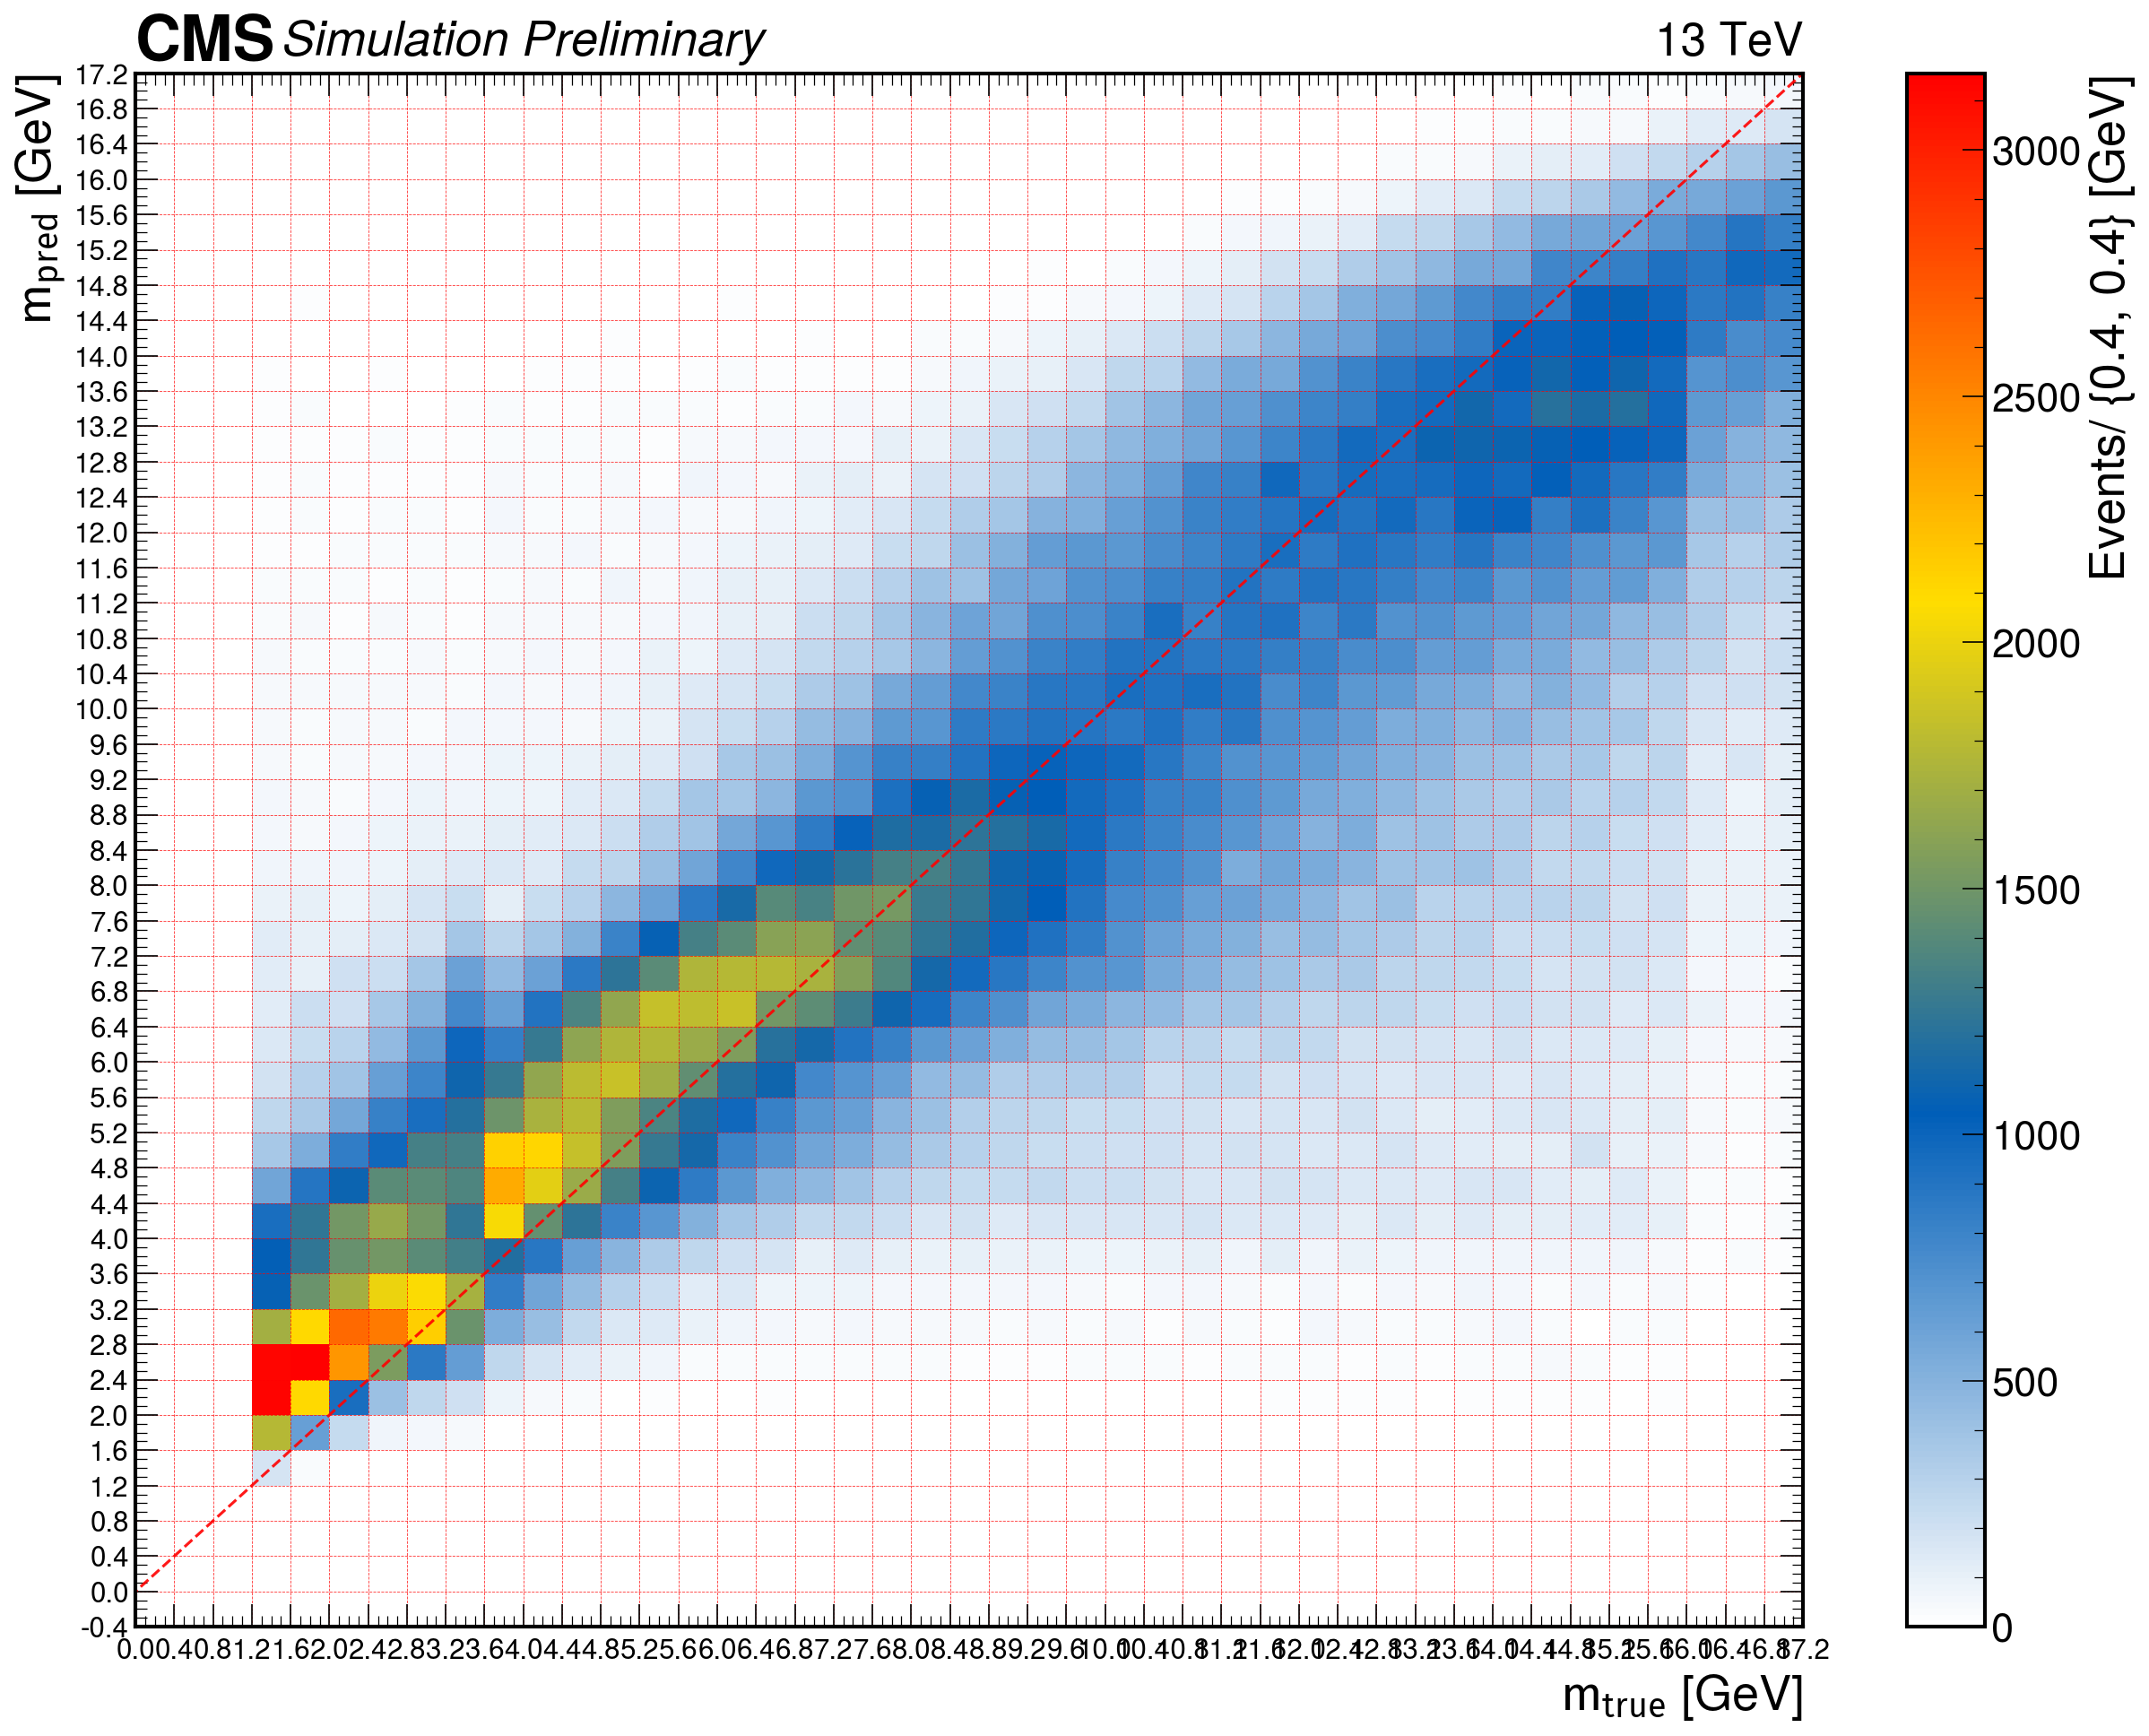

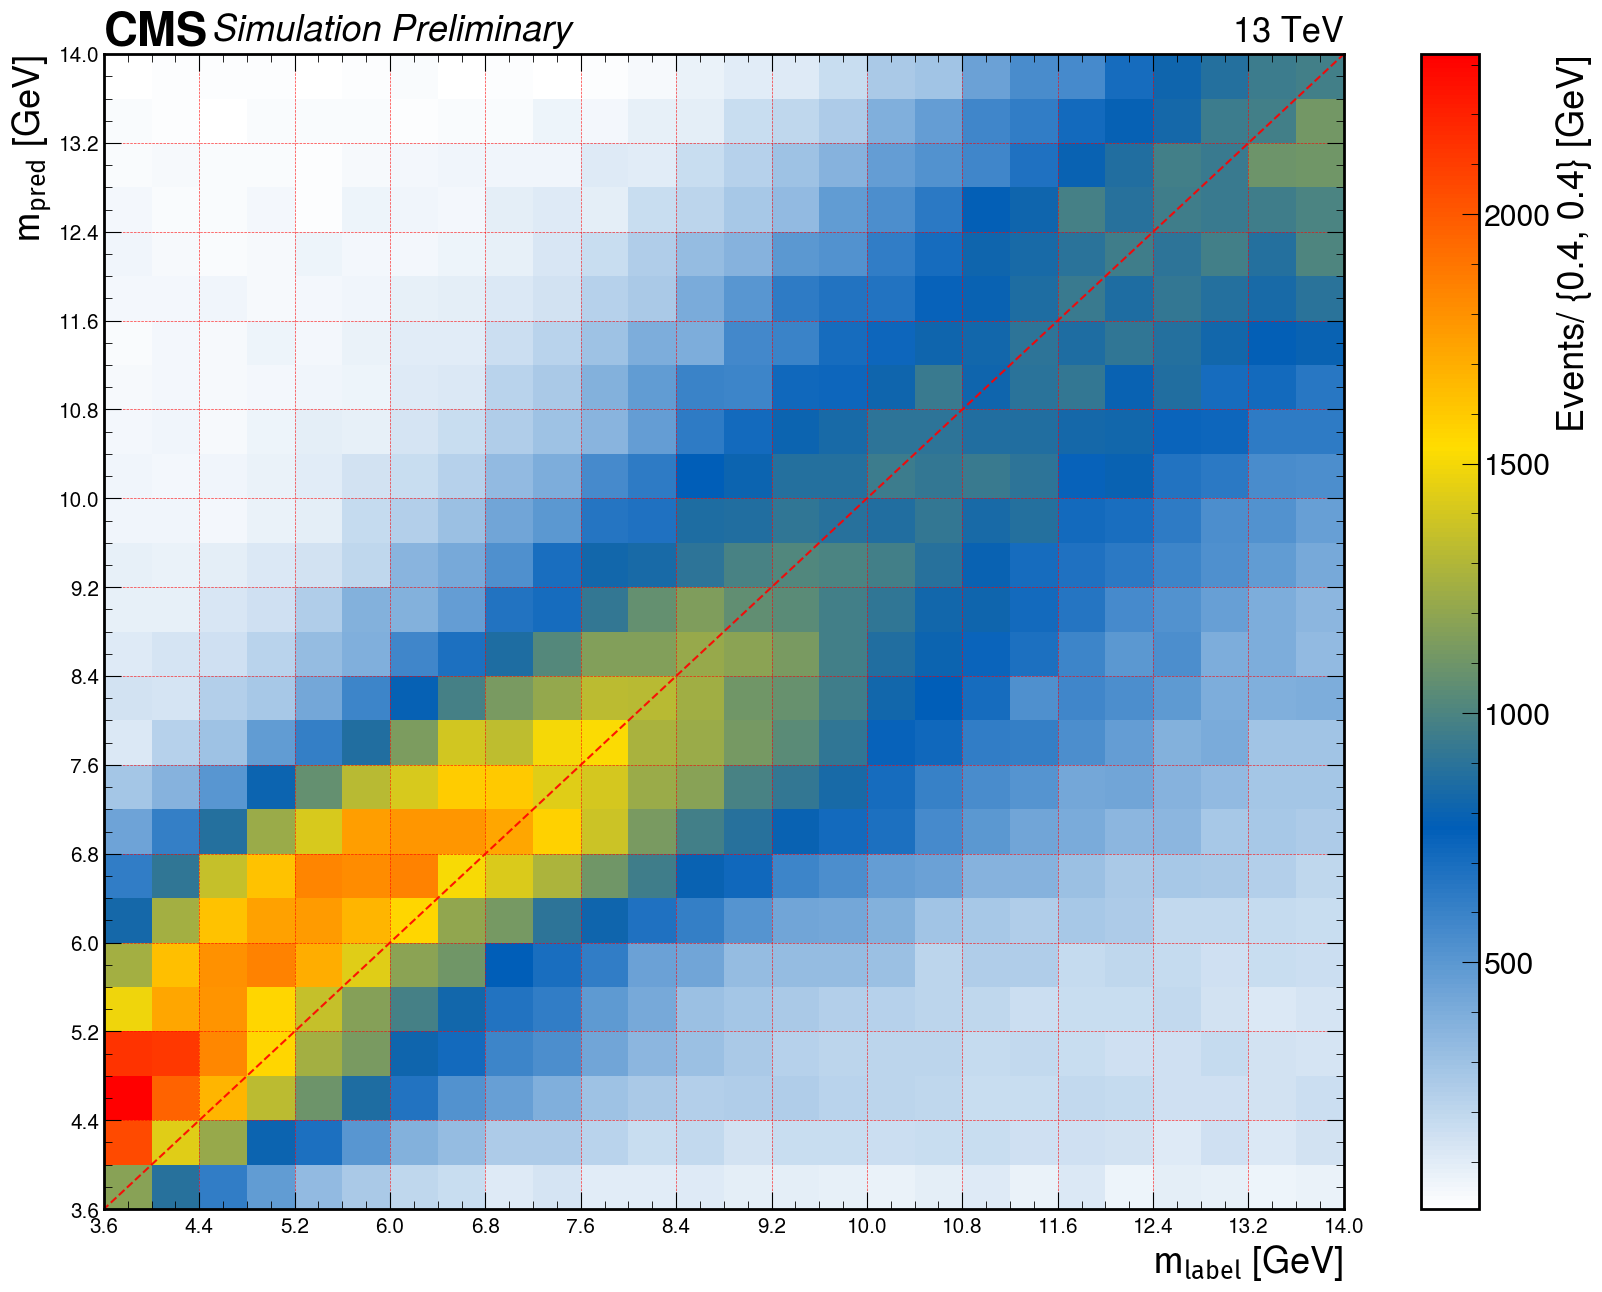

In [12]:
# 2D hist mteru and mpred
# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .4),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .4),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(3.6, 14.1, .8),size=15)
plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

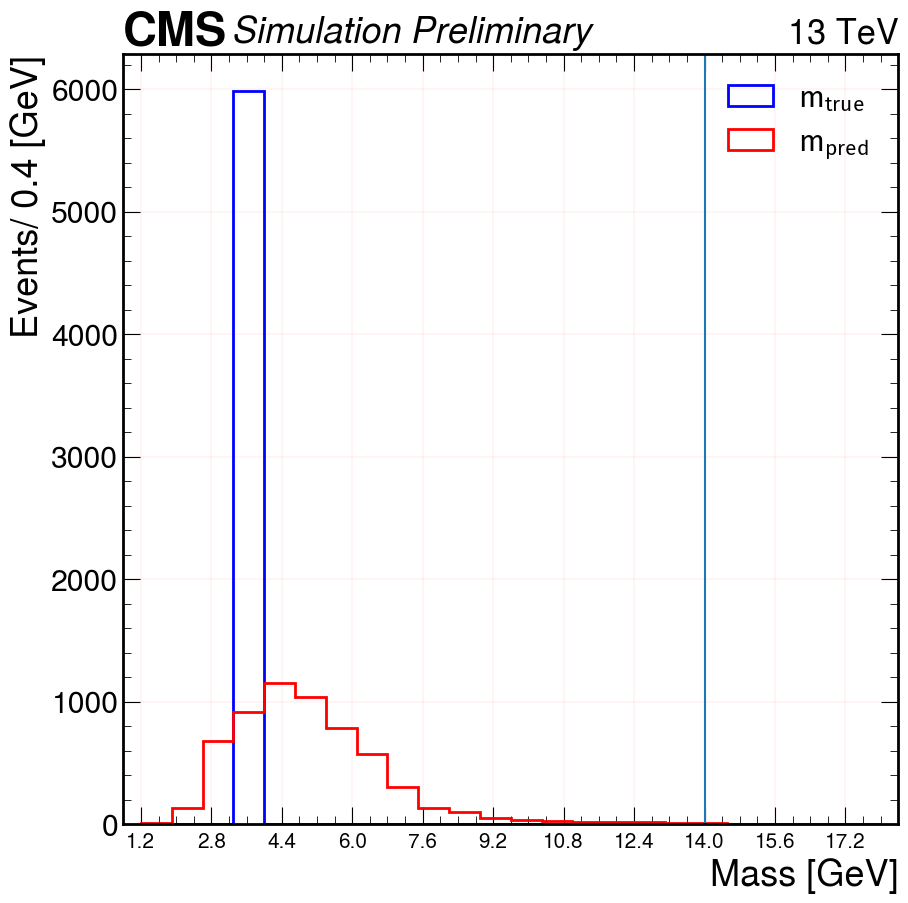

In [13]:
m_true, m_pred = [], []
for i in range(len(m_true_)):
    if m_true_[i]<3.5 or m_true_[i] >3.7 :continue
    m_true.append(m_true_[i])
    m_pred.append(m_pred_[i])
    
bin_size=.4
fig, ax = plt.subplots(figsize=(10,10))
plt.hist(np.squeeze(m_true), range=(1.2,18), bins=len(np.arange(9,18+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2,log=0)
plt.hist(np.squeeze(m_pred), range=(1.2,18), bins=len(np.arange(9,18+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2,log=0)
plt.xlim(1.2-bin_size,18+bin_size)
plt.xticks(np.arange(1.2,18+bin_size,1.6),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]' )
plt.axvline(x=14)
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses', size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_truncate.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()    
        

In [15]:
m_true, m_pred = [], []
for i in range(len(m_true_)):
    if m_true_[i]<3.6 or m_true >14 :continue
    m_true.append(m_true_[i])
    m_pred.append(m_pred_[i])
    
bin_size=.4
fig, ax = plt.subplots(figsize=(10,10))
plt.hist(np.squeeze(m_true), range=(1.2,18), bins=len(np.arange(9,18+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2,log=0)
plt.hist(np.squeeze(m_pred), range=(1.2,18), bins=len(np.arange(9,18+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2,log=0)
plt.xlim(1.2-bin_size,18+bin_size)
plt.xticks(np.arange(1.2,18+bin_size,1.6),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]' )
# plt.axvline(x=14)
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses', size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_truncate.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()    

TypeError: '>' not supported between instances of 'list' and 'int'

In [9]:
###----------------m1To17p2_5ch_[8,16,32,64]-------------------------------------------

In [8]:
local='/uscms/home/bbbam/nobackup/mass_regression_models_for_validation_tests_using_data_v2/4_channels_massregressor_ResNet_3/4*M5*/'
rhFileList = '%s/*.pkl'%(local)
paths = glob.glob(rhFileList)
assert len(paths) > 0
print(f"{len(paths)} files found")

AssertionError: 

In [20]:
epoch=1

data_file = paths[epoch-1]
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
mae_ = data["mae"]
mre_ = data["mre"]

loaded data file ------>  /uscms/home/bbbam/nobackup/mass_regression_models_for_validation_tests_using_data_v2/4_channels_massregressor_ResNet_3/4_channels_aToTauTau_massregressor_M5/epoch11_val_pseudoscalar_mae64.0173_inference_data.pkl


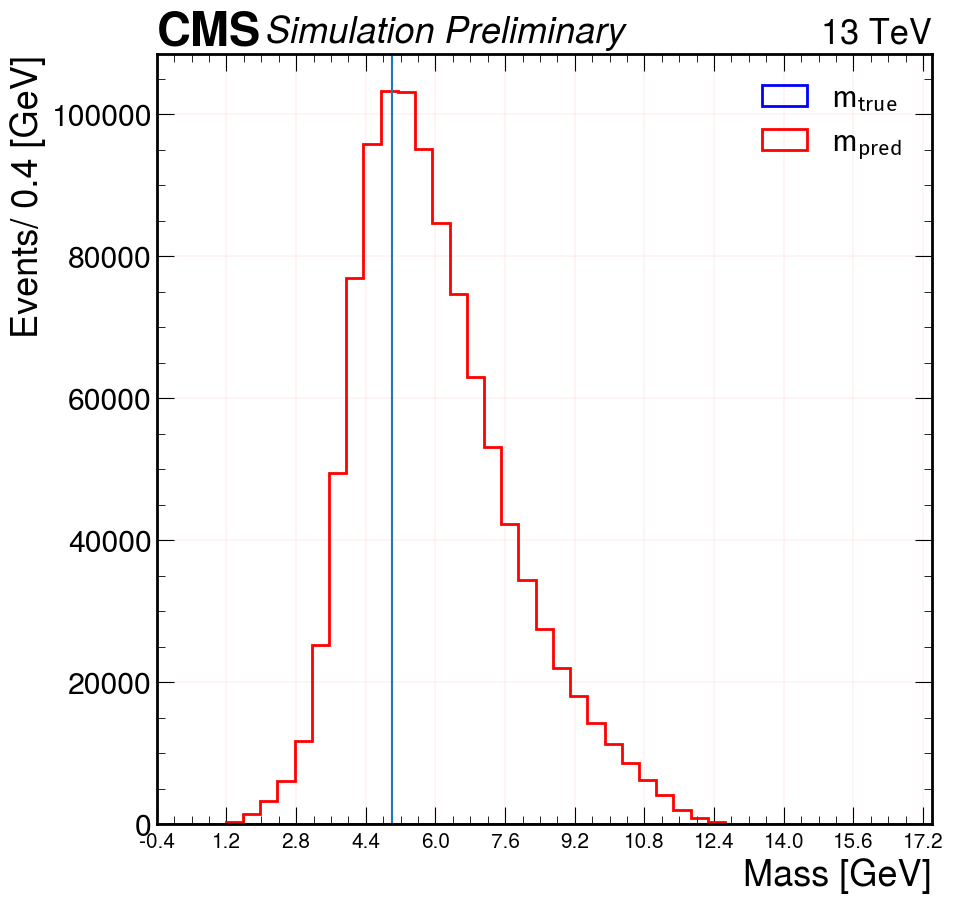

In [22]:
# Check 1D m_pred
# Extebded version
m0_min = 0.8
m0_max = 16.2
bin_size = 0.4
fig, ax = plt.subplots(figsize=(10,10))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,1.6),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
plt.axvline(x=5)
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# # Truncated version
# fig, ax = plt.subplots(figsize=(20,20))
# plt.hist(m_true_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
# plt.hist(m_pred_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
# plt.xlim(m0_min-bin_size,m0_max+bin_size)
# plt.xticks(np.arange(m0_min,m0_max+bin_size,bin_size),size=15)
# plt.grid(color='r', linestyle='--', linewidth=.1)
# plt.xlabel('Mass [GeV]')
# plt.ylabel('Events/ 0.4 [GeV]' )
# # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses', size=25)
# plt.legend(loc='upper right')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# # plt.savefig('%s/%d_mtru_mpred_hist_truncate.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
# plt.show()

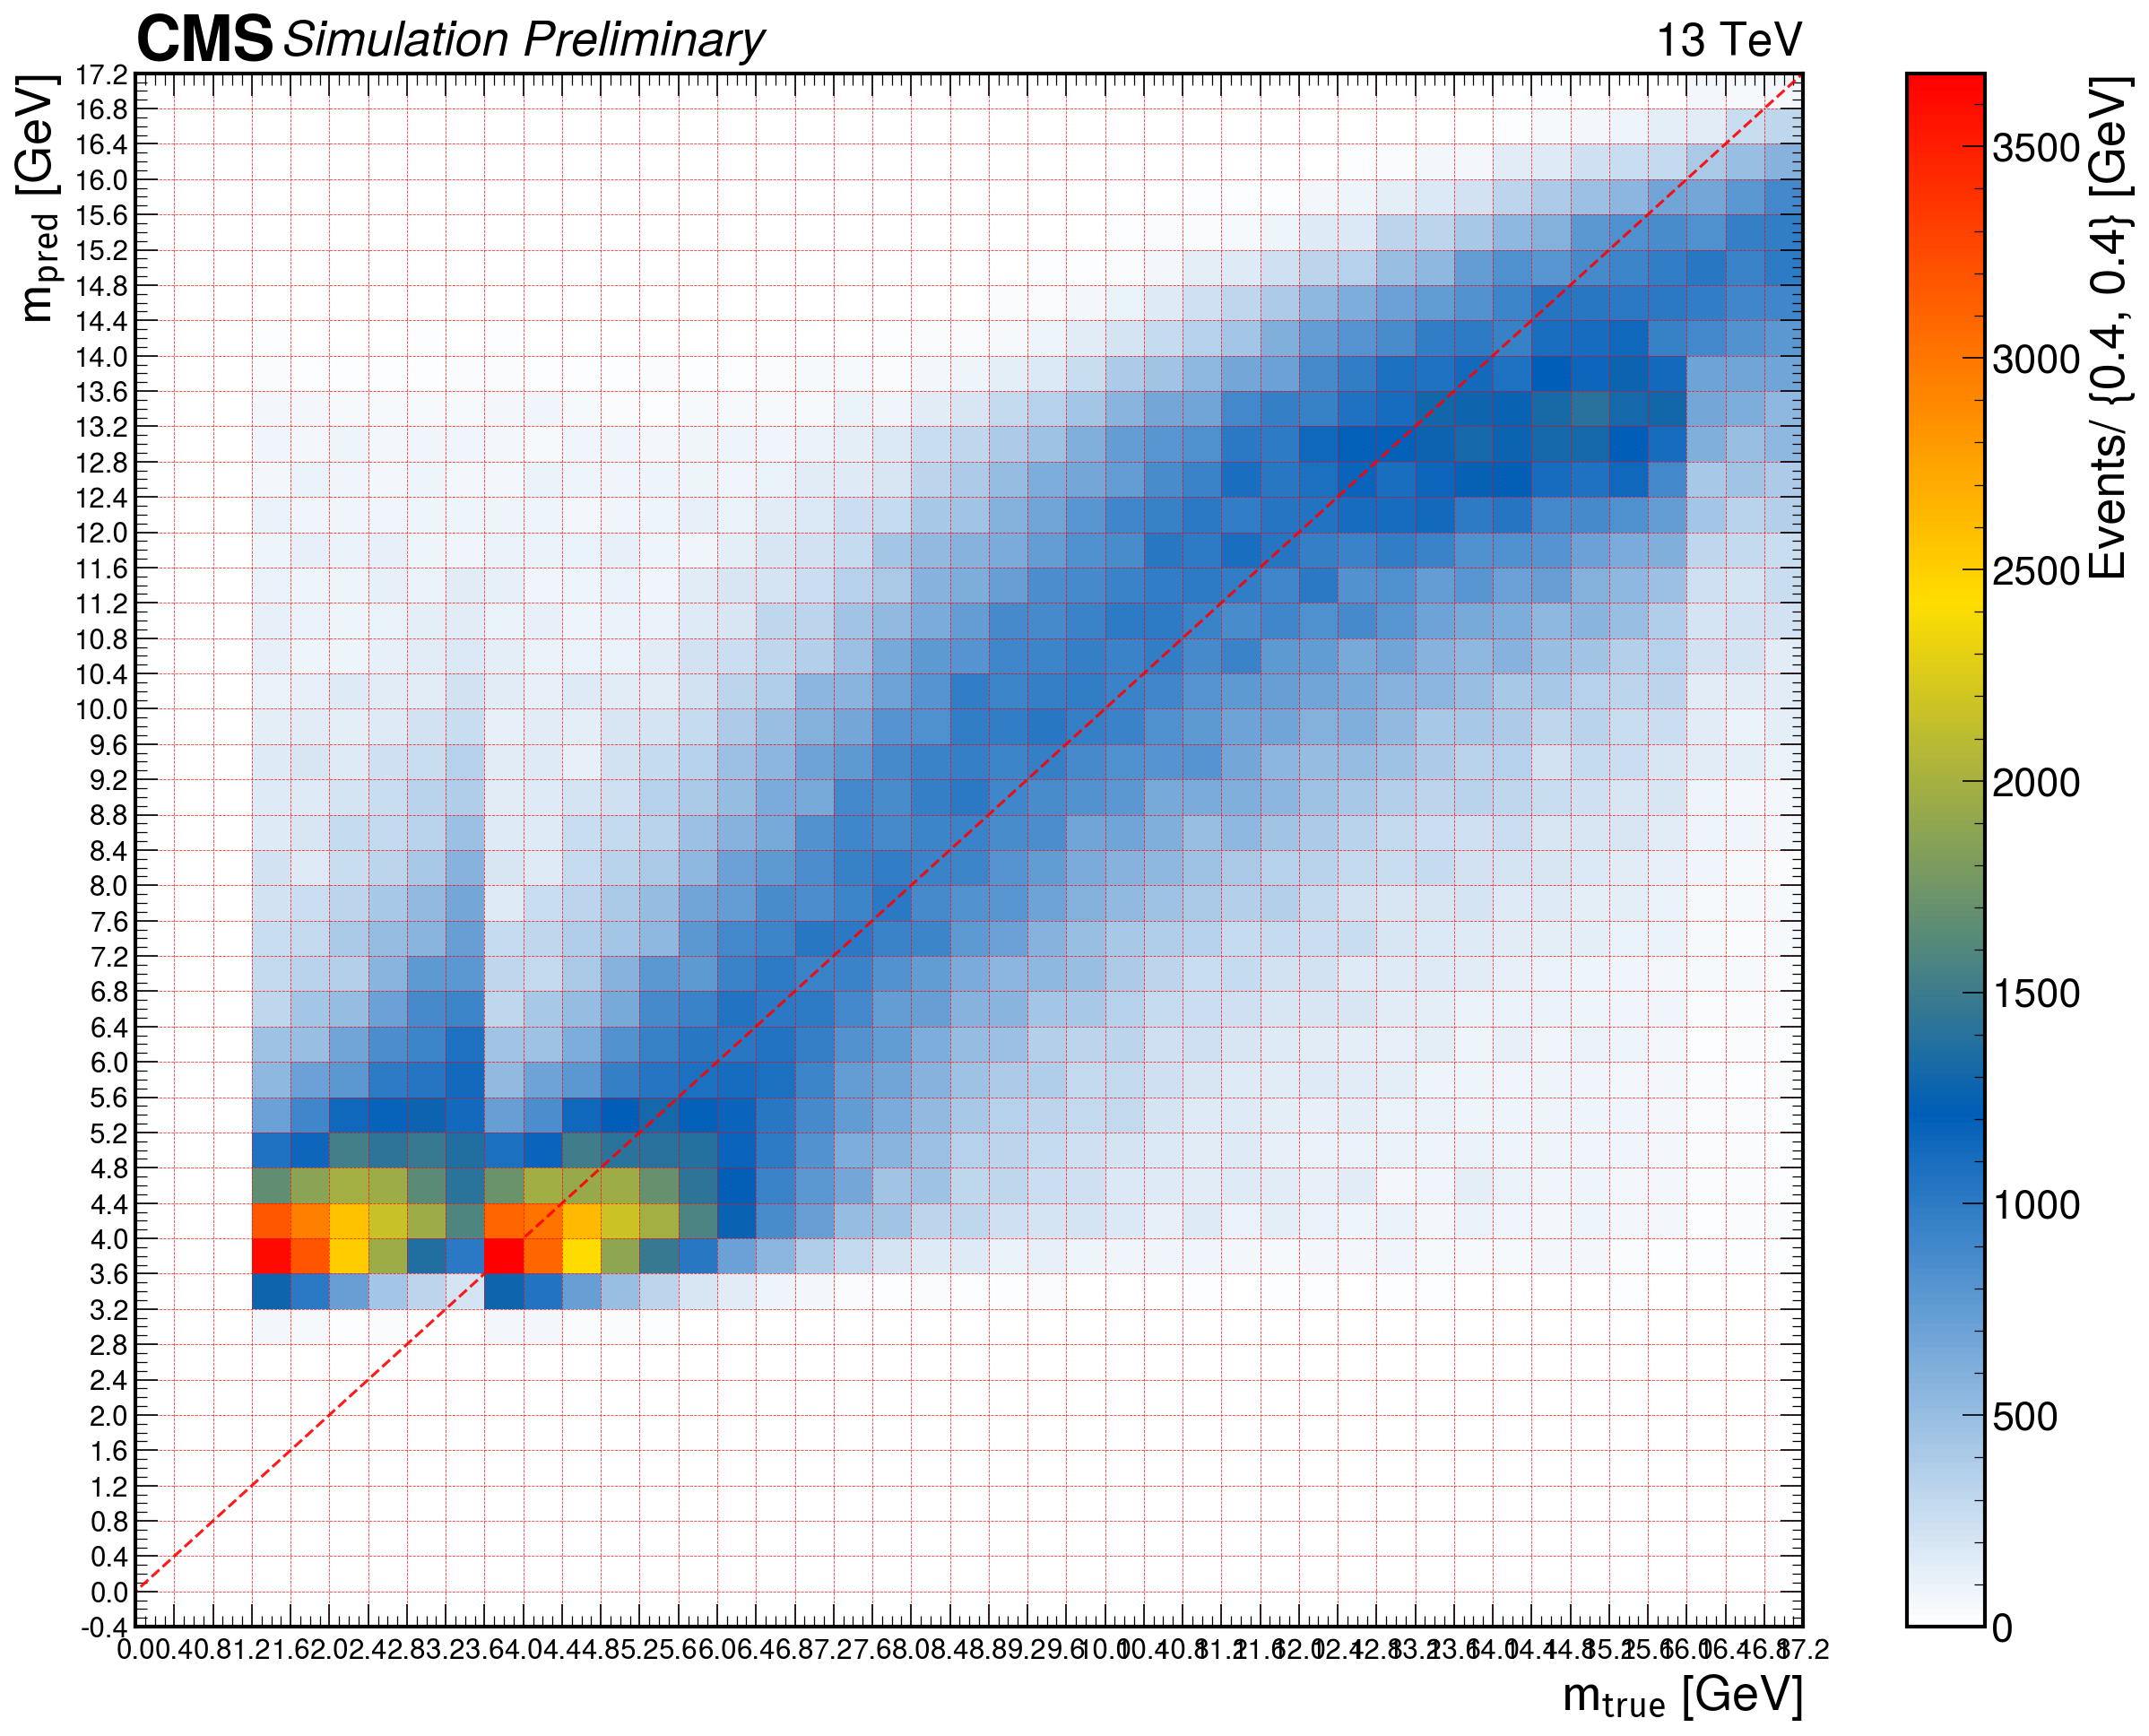

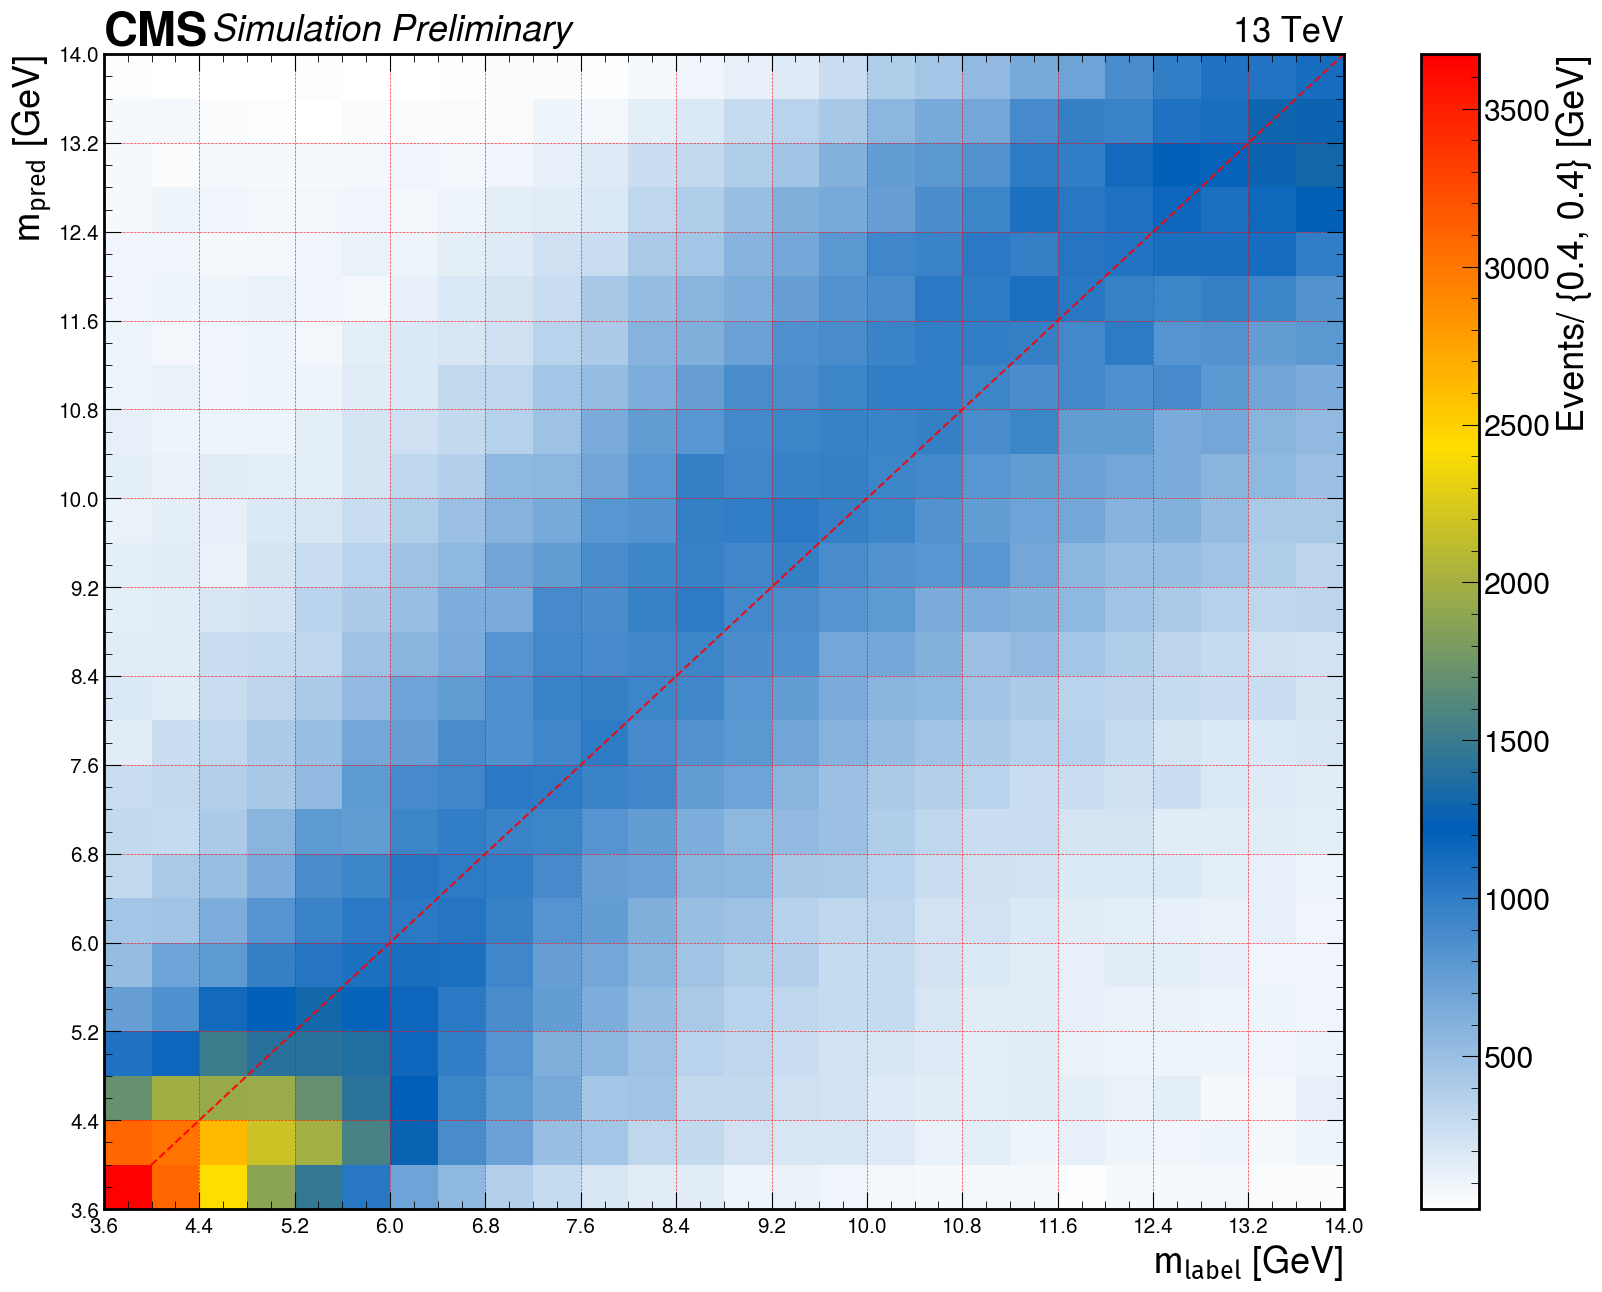

In [13]:
# 2D hist mteru and mpred
# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .4),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .4),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(3.6, 14.1, .8),size=15)
plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

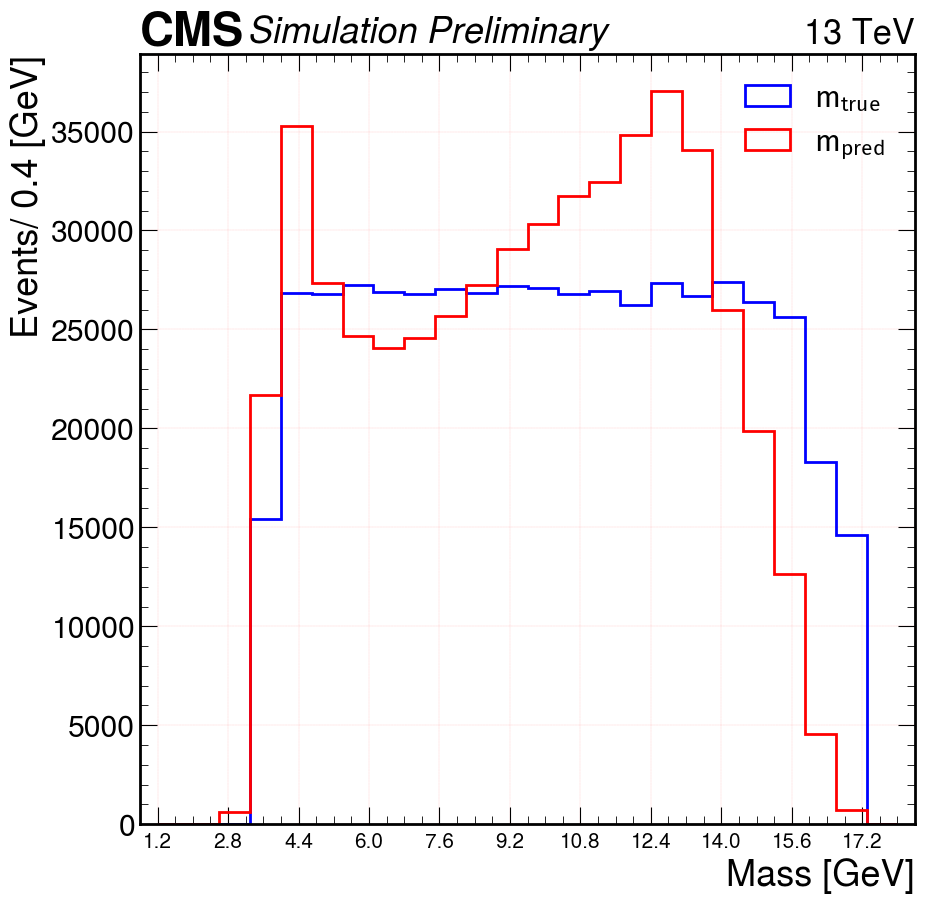

In [14]:
m_true, m_pred = [], []
for i in range(len(m_true_)):
    if m_true_[i]<3.6 :continue
    m_true.append(m_true_[i])
    m_pred.append(m_pred_[i])
    
bin_size=.4
fig, ax = plt.subplots(figsize=(10,10))
plt.hist(np.squeeze(m_true), range=(1.2,18), bins=len(np.arange(9,18+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2,log=0)
plt.hist(np.squeeze(m_pred), range=(1.2,18), bins=len(np.arange(9,18+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2,log=0)
plt.xlim(1.2-bin_size,18+bin_size)
plt.xticks(np.arange(1.2,18+bin_size,1.6),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]' )
# plt.axvline(x=14)
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses', size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_truncate.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()    
        

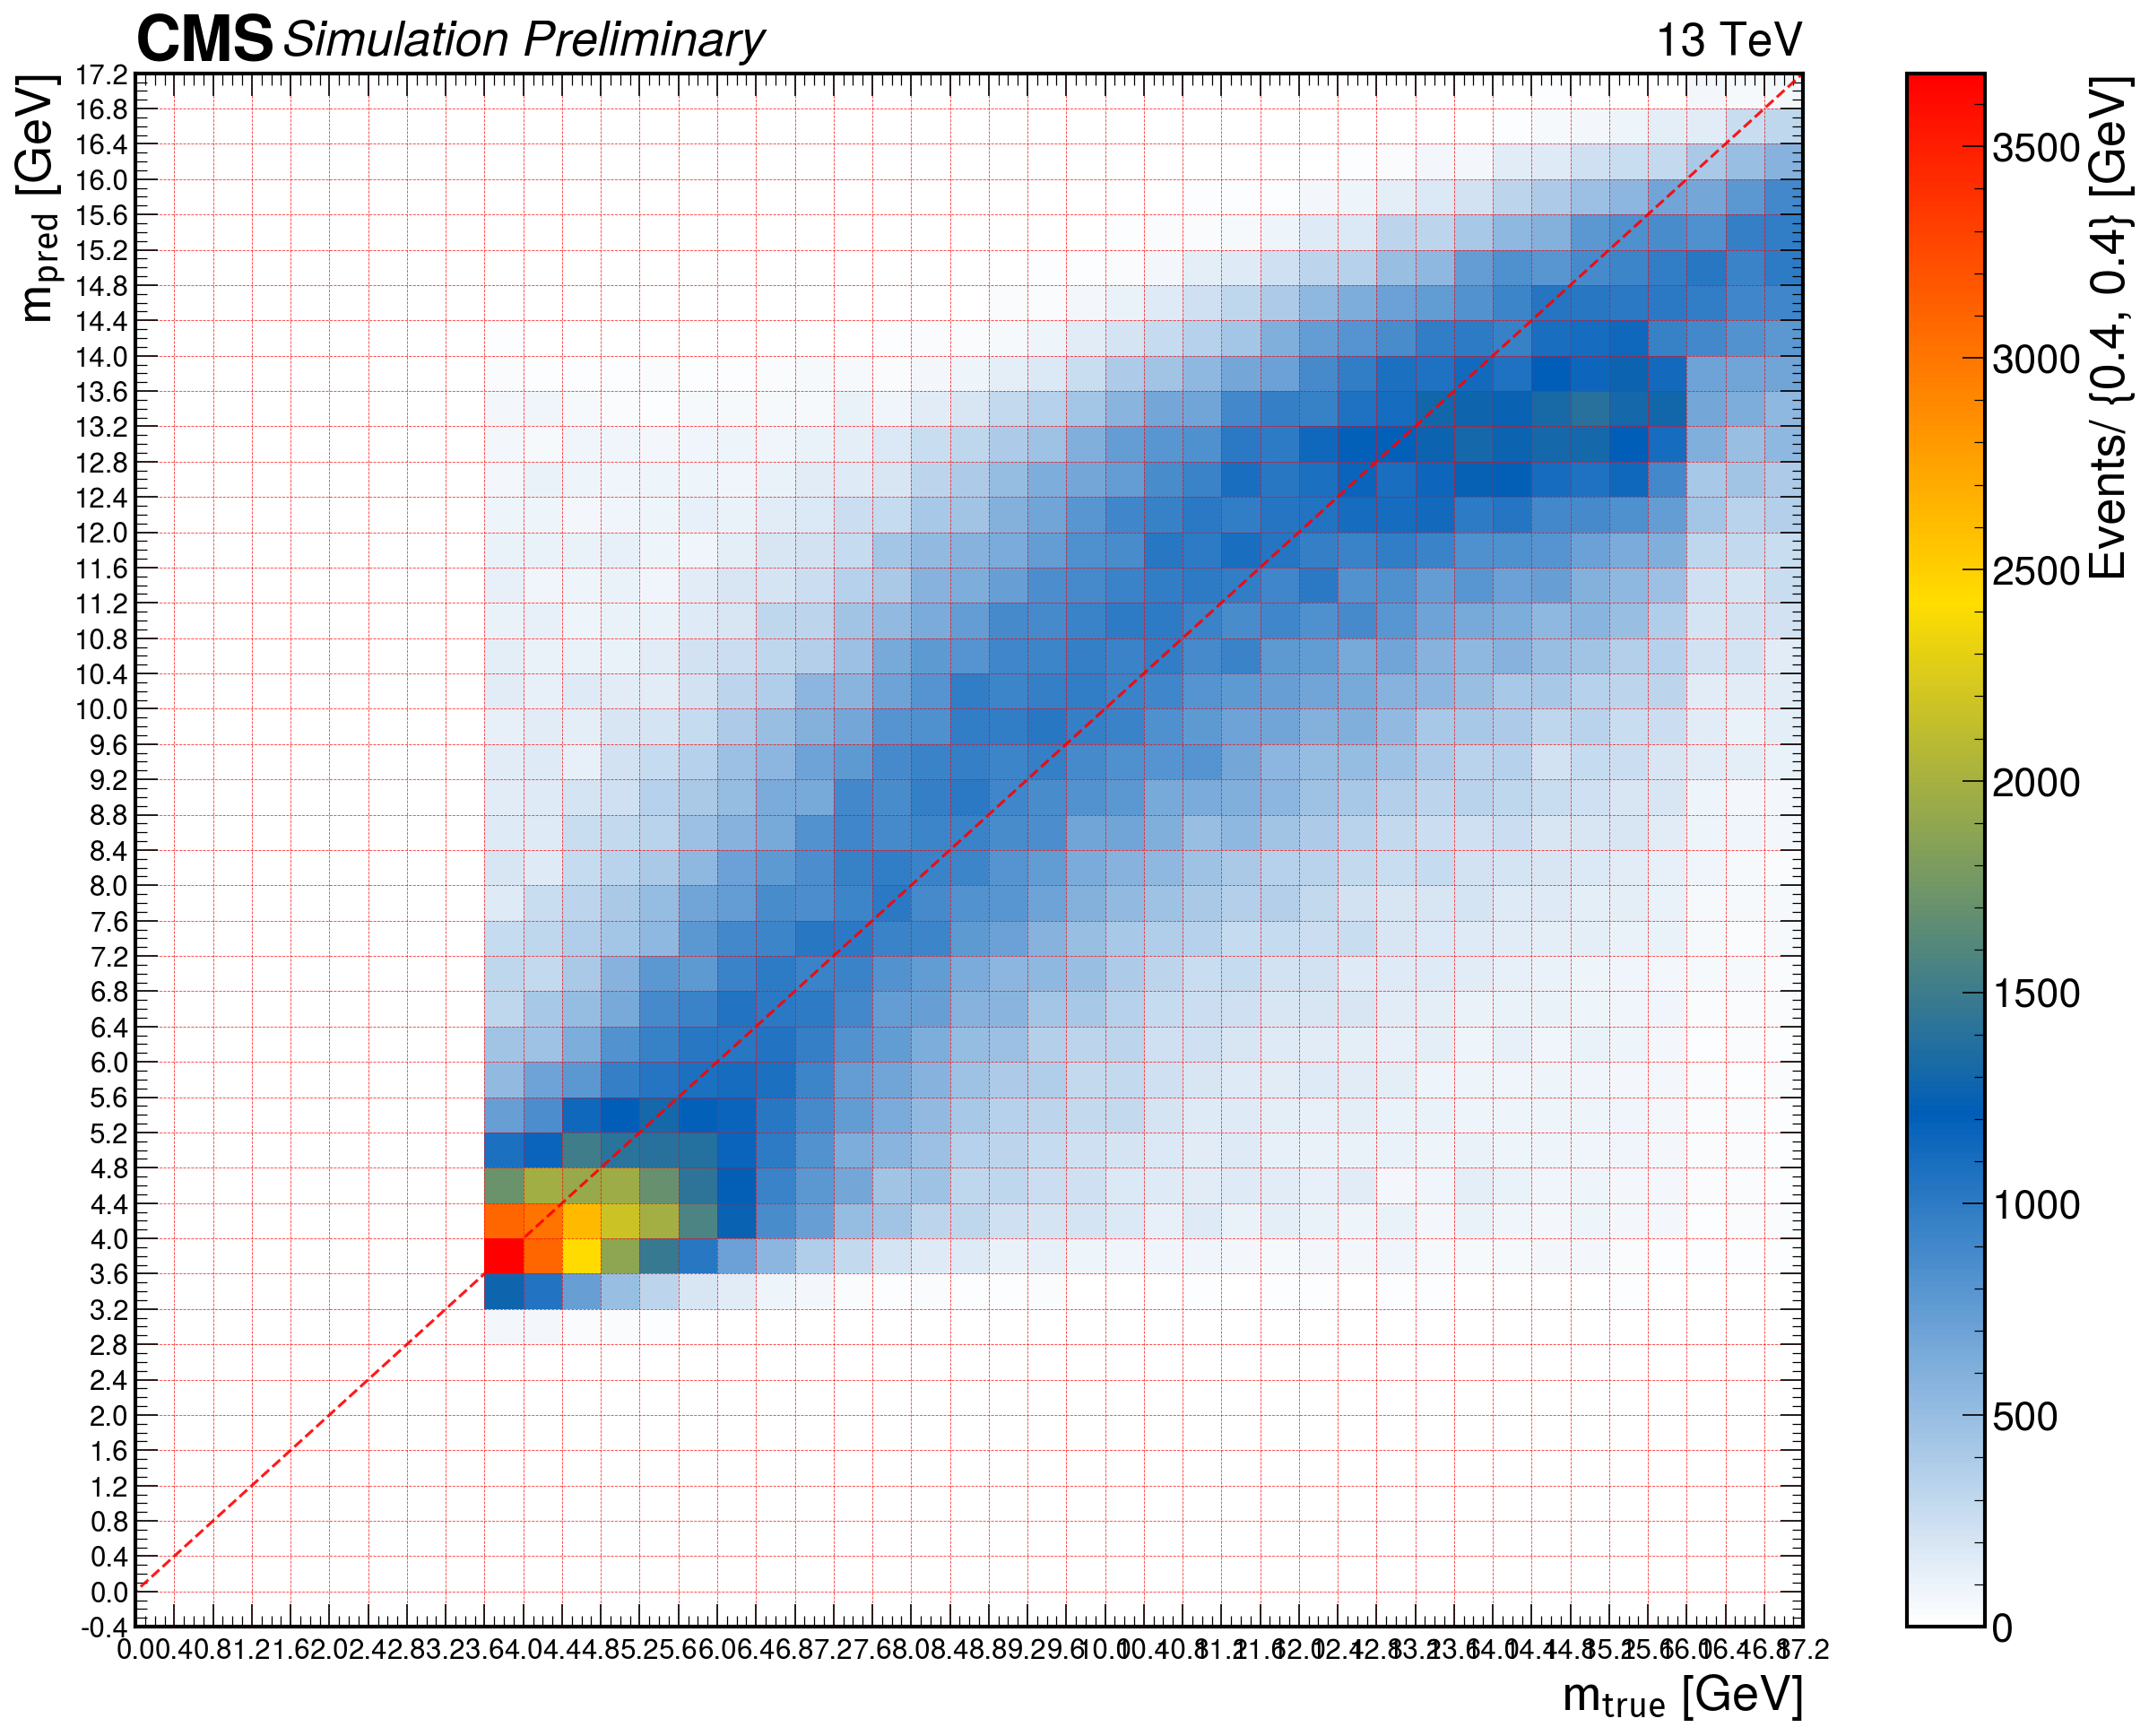

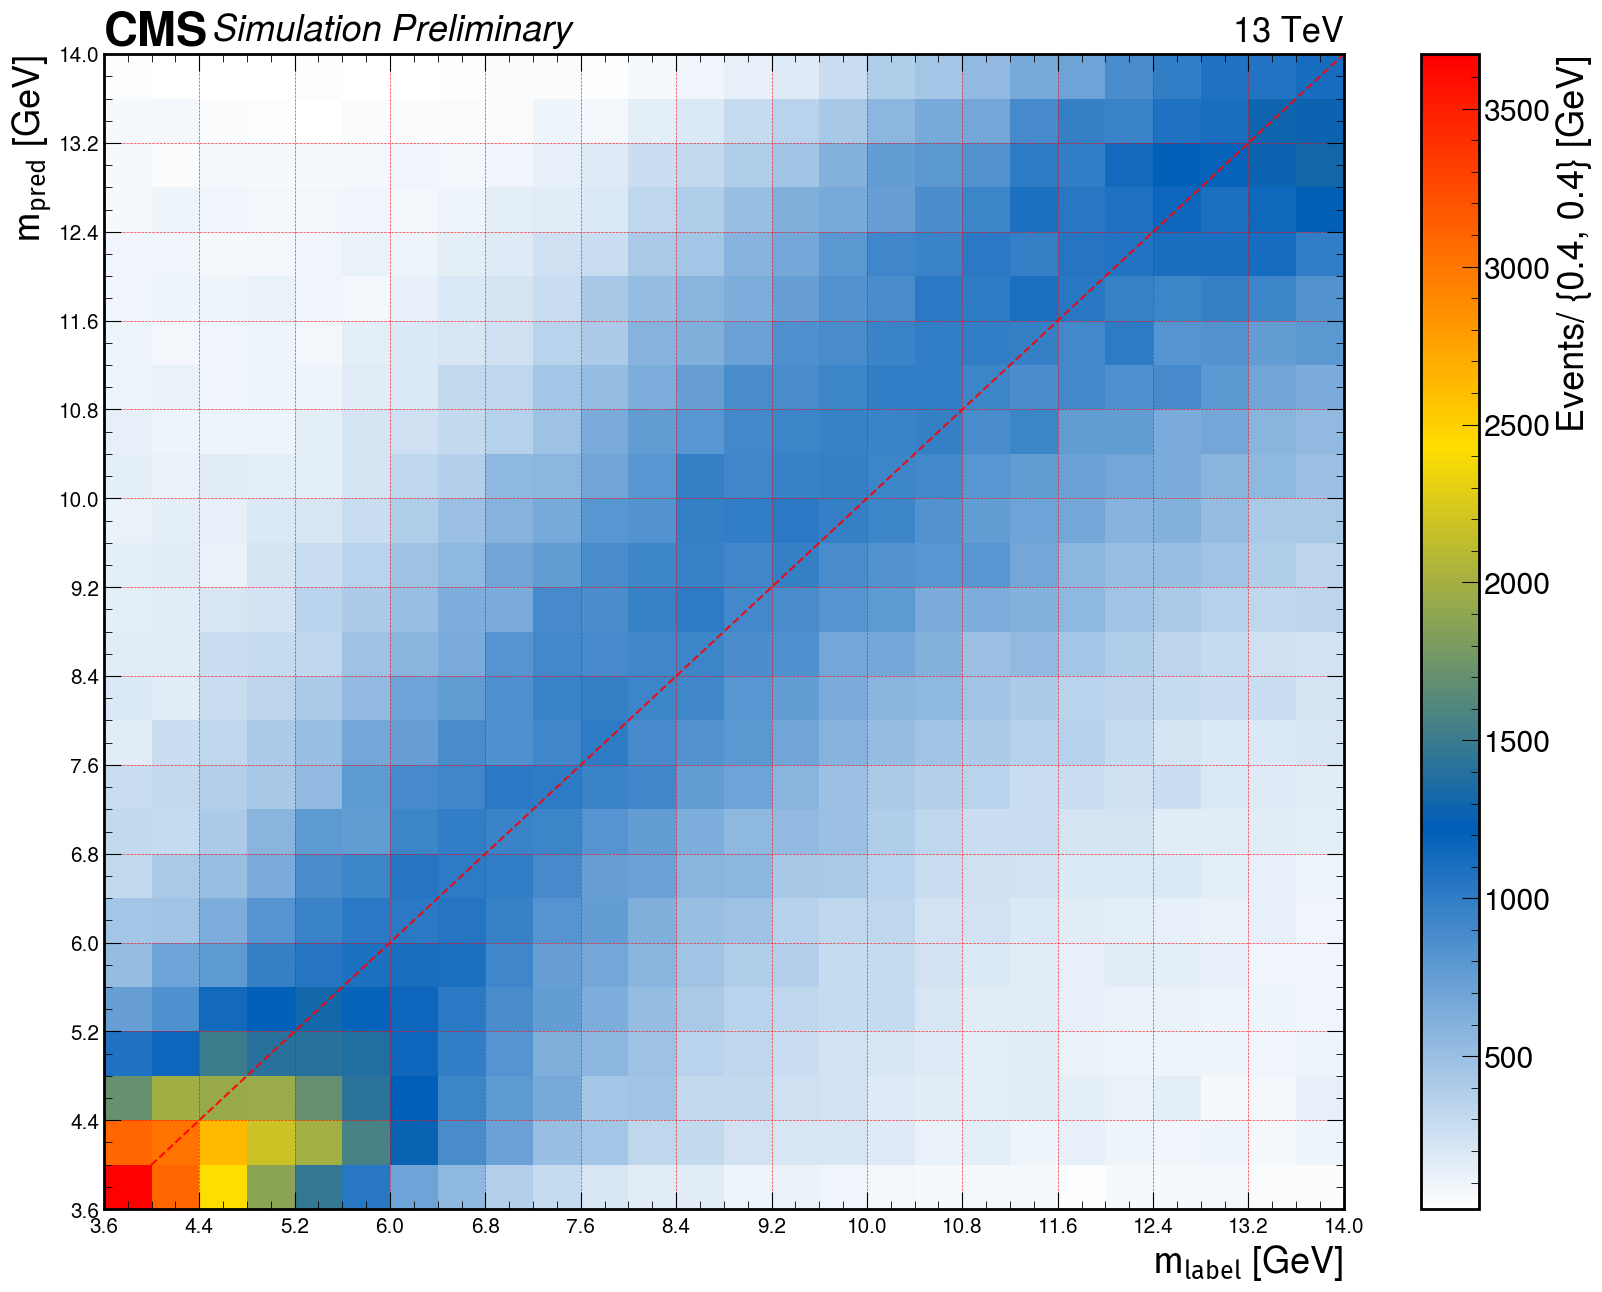

In [15]:
# 2D hist mteru and mpred
# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true), np.squeeze(m_pred), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .4),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .4),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true), np.squeeze(m_pred), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(3.6, 14.1, .8),size=15)
plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

In [16]:
### mass_trainer_aToTauTau_m1p2To17p2_v2_20%Unpy_5ch

In [17]:
local='/home/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_20%Unpy_5ch/INFERENCE_DATA/5_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_20%Unphy_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from0_ntrain4659200_nval504832_run0/'
rhFileList = '%s/*.pkl'%(local)
paths = glob.glob(rhFileList)
assert len(paths) > 0
print(f"{len(paths)} files found")

15 files found


In [18]:
epoch=15
data_file = paths[epoch-1]
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()
m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
mae_ = data["mae"]
mre_ = data["mre"]

loaded data file ------>  /home/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_20%Unpy_5ch/INFERENCE_DATA/5_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_20%Unphy_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from0_ntrain4659200_nval504832_run0/epoch15_val_pseudoscalar_mae1.9185_inference_data.pkl


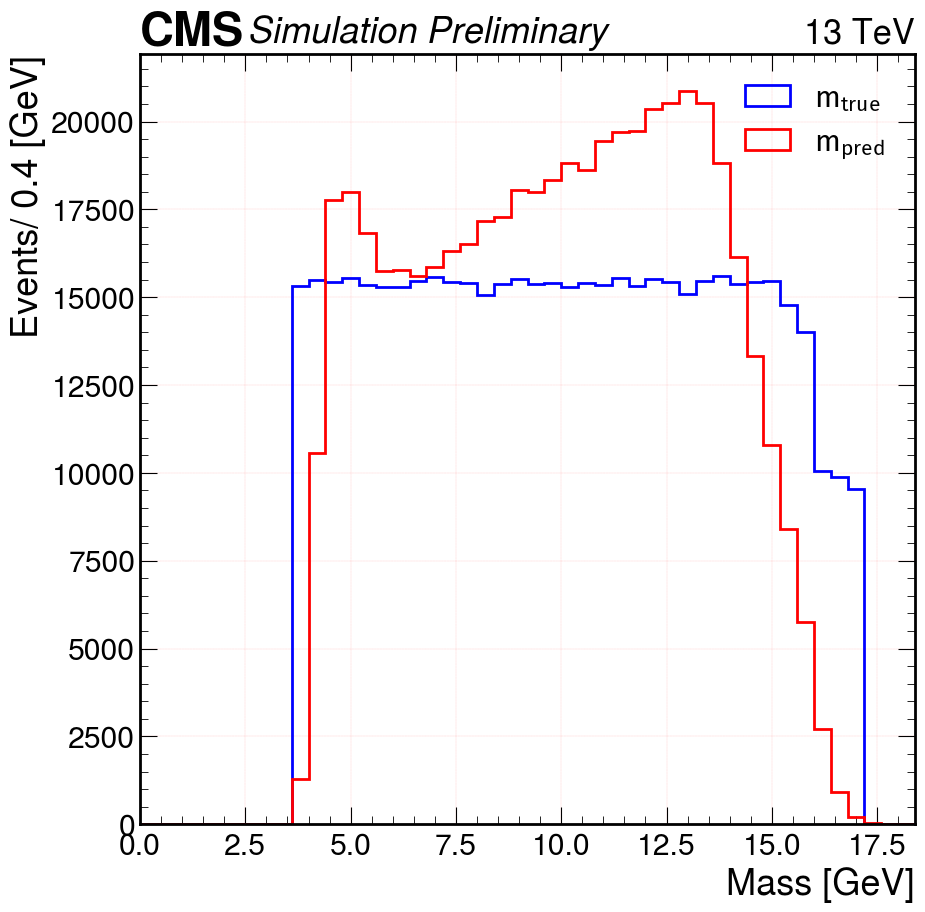

In [19]:
# Check 1D m_pred
# Extebded version
m0_min = 1.2
m0_max = 17.2
bin_size = 0.4
fig, ax = plt.subplots()
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
# plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# # Truncated version
# fig, ax = plt.subplots(figsize=(20,20))
# plt.hist(m_true_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
# plt.hist(m_pred_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
# plt.xlim(m0_min-bin_size,m0_max+bin_size)
# plt.xticks(np.arange(m0_min,m0_max+bin_size,bin_size),size=15)
# plt.grid(color='r', linestyle='--', linewidth=.1)
# plt.xlabel('Mass [GeV]')
# plt.ylabel('Events/ 0.4 [GeV]' )
# # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses', size=25)
# plt.legend(loc='upper right')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# # plt.savefig('%s/%d_mtru_mpred_hist_truncate.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
# plt.show()

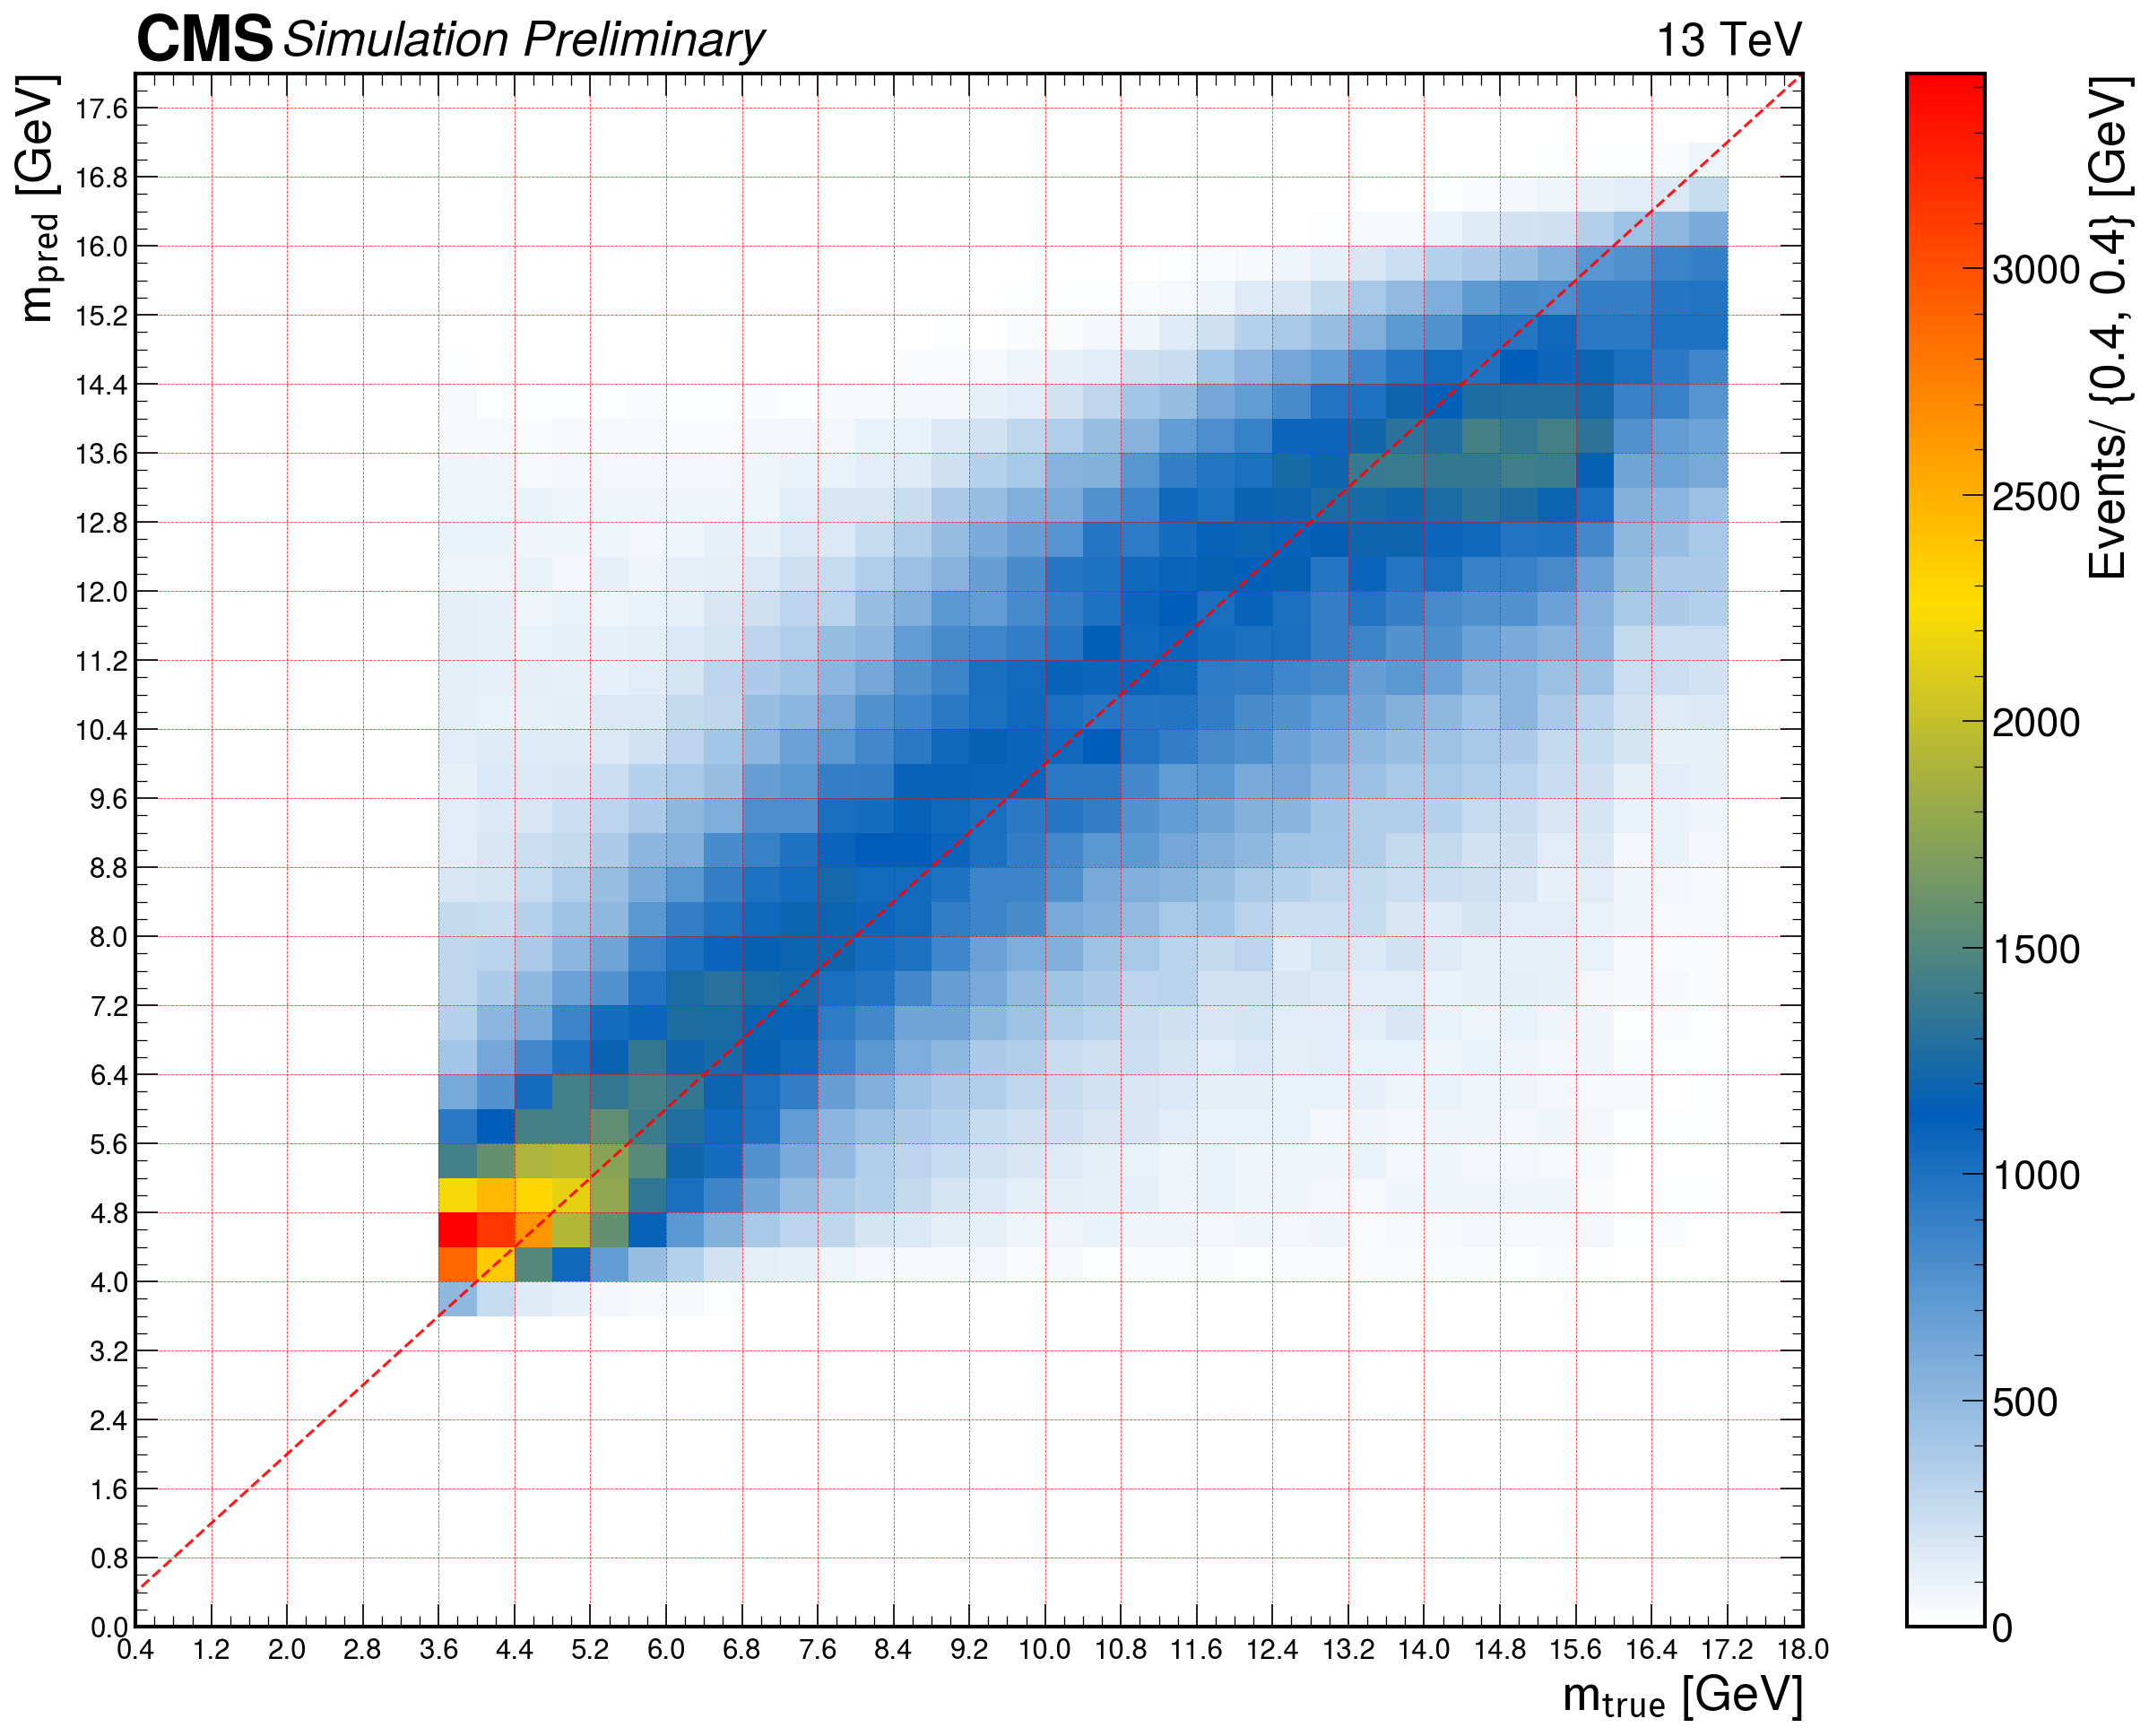

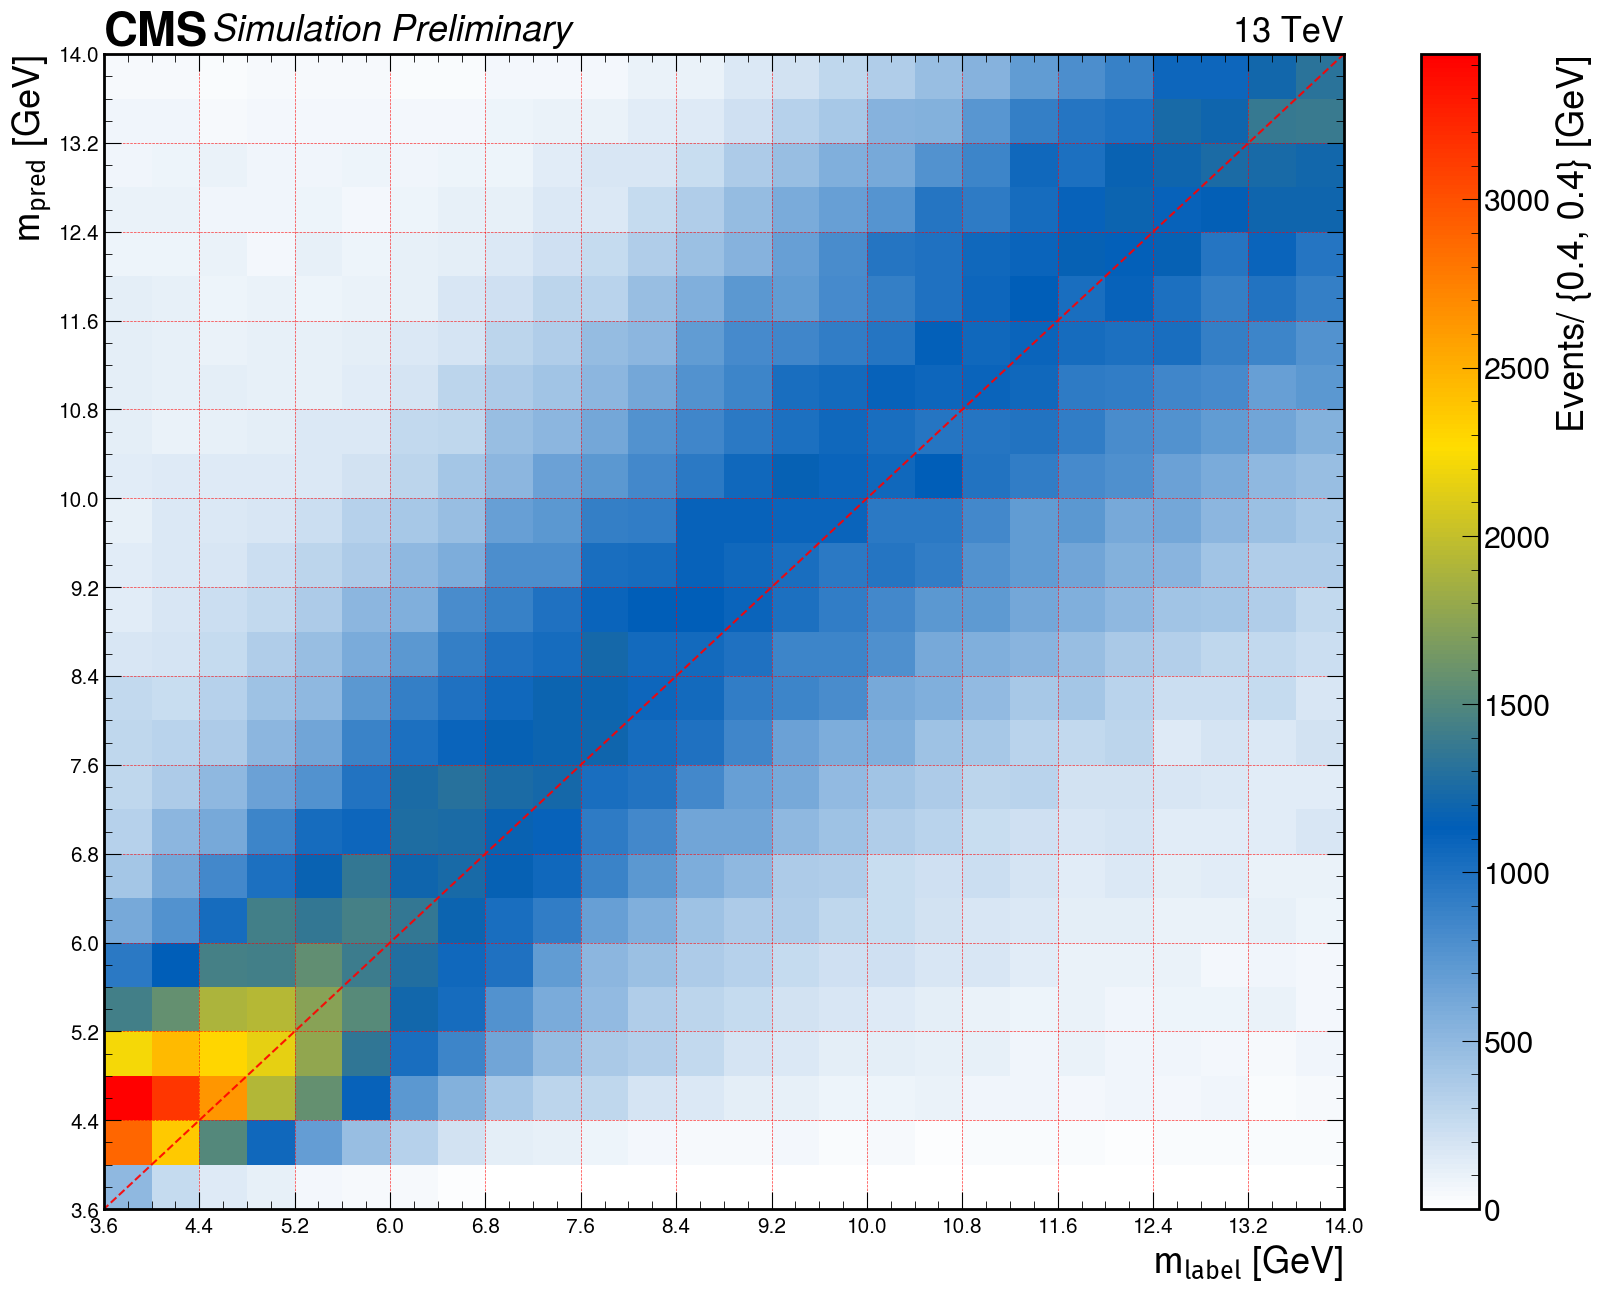

In [20]:
# 2D hist mteru and mpred
# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(3.6, 14.1, .8),size=15)
plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

In [21]:
### mass_trainer_aToTauTau_m1p2To17p2_v2_20%Unpy_13ch/mass_trainer_aToTauTau_m1p2To17p2_v2_20%Unpy_13ch

In [22]:
local='/home/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_20%Unpy_13ch/INFERENCE_DATA/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_20%Unphy_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from0_ntrain4659200_nval504832_run0/'
rhFileList = '%s/*.pkl'%(local)
paths = glob.glob(rhFileList)
assert len(paths) > 0
print(f"{len(paths)} files found")

9 files found


In [23]:
epoch=9
data_file = paths[epoch-1]
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()
m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
mae_ = data["mae"]
mre_ = data["mre"]

loaded data file ------>  /home/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_20%Unpy_13ch/INFERENCE_DATA/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_20%Unphy_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from0_ntrain4659200_nval504832_run0/epoch9_val_pseudoscalar_mae1.9193_inference_data.pkl


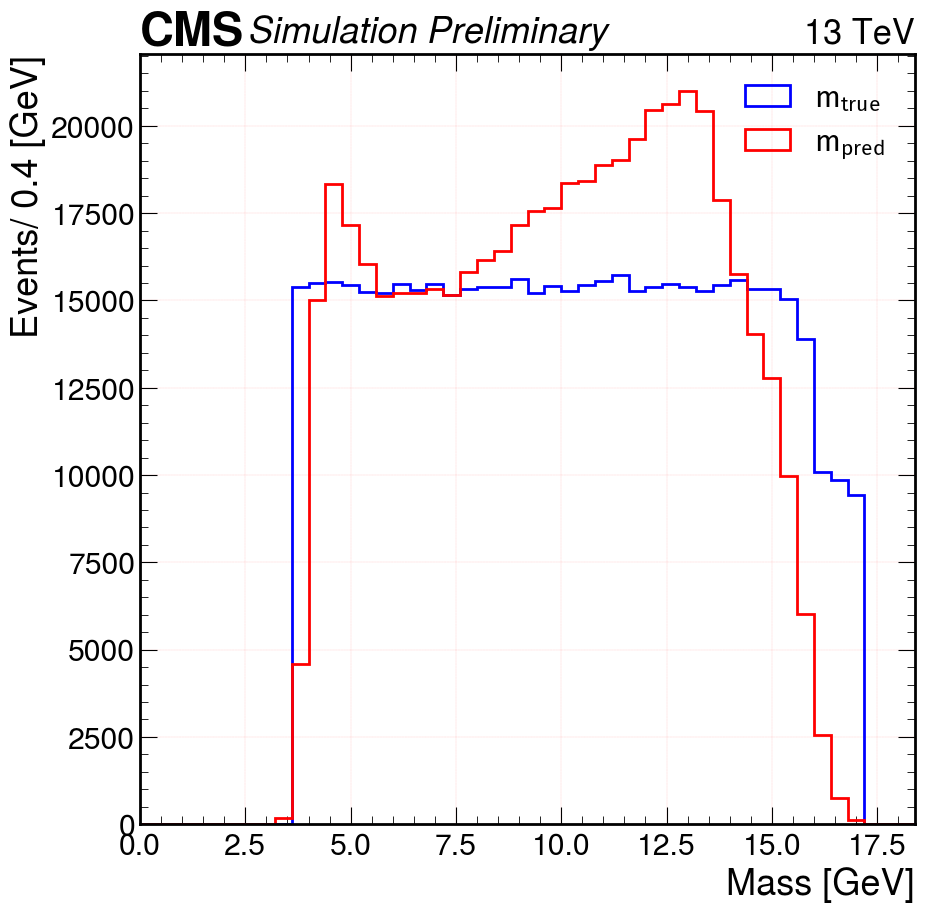

In [24]:
# Check 1D m_pred
# Extebded version
m0_min = 1.2
m0_max = 17.2
bin_size = 0.4
fig, ax = plt.subplots()
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
# plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# # Truncated version
# fig, ax = plt.subplots(figsize=(20,20))
# plt.hist(m_true_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
# plt.hist(m_pred_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
# plt.xlim(m0_min-bin_size,m0_max+bin_size)
# plt.xticks(np.arange(m0_min,m0_max+bin_size,bin_size),size=15)
# plt.grid(color='r', linestyle='--', linewidth=.1)
# plt.xlabel('Mass [GeV]')
# plt.ylabel('Events/ 0.4 [GeV]' )
# # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses', size=25)
# plt.legend(loc='upper right')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# # plt.savefig('%s/%d_mtru_mpred_hist_truncate.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
# plt.show()

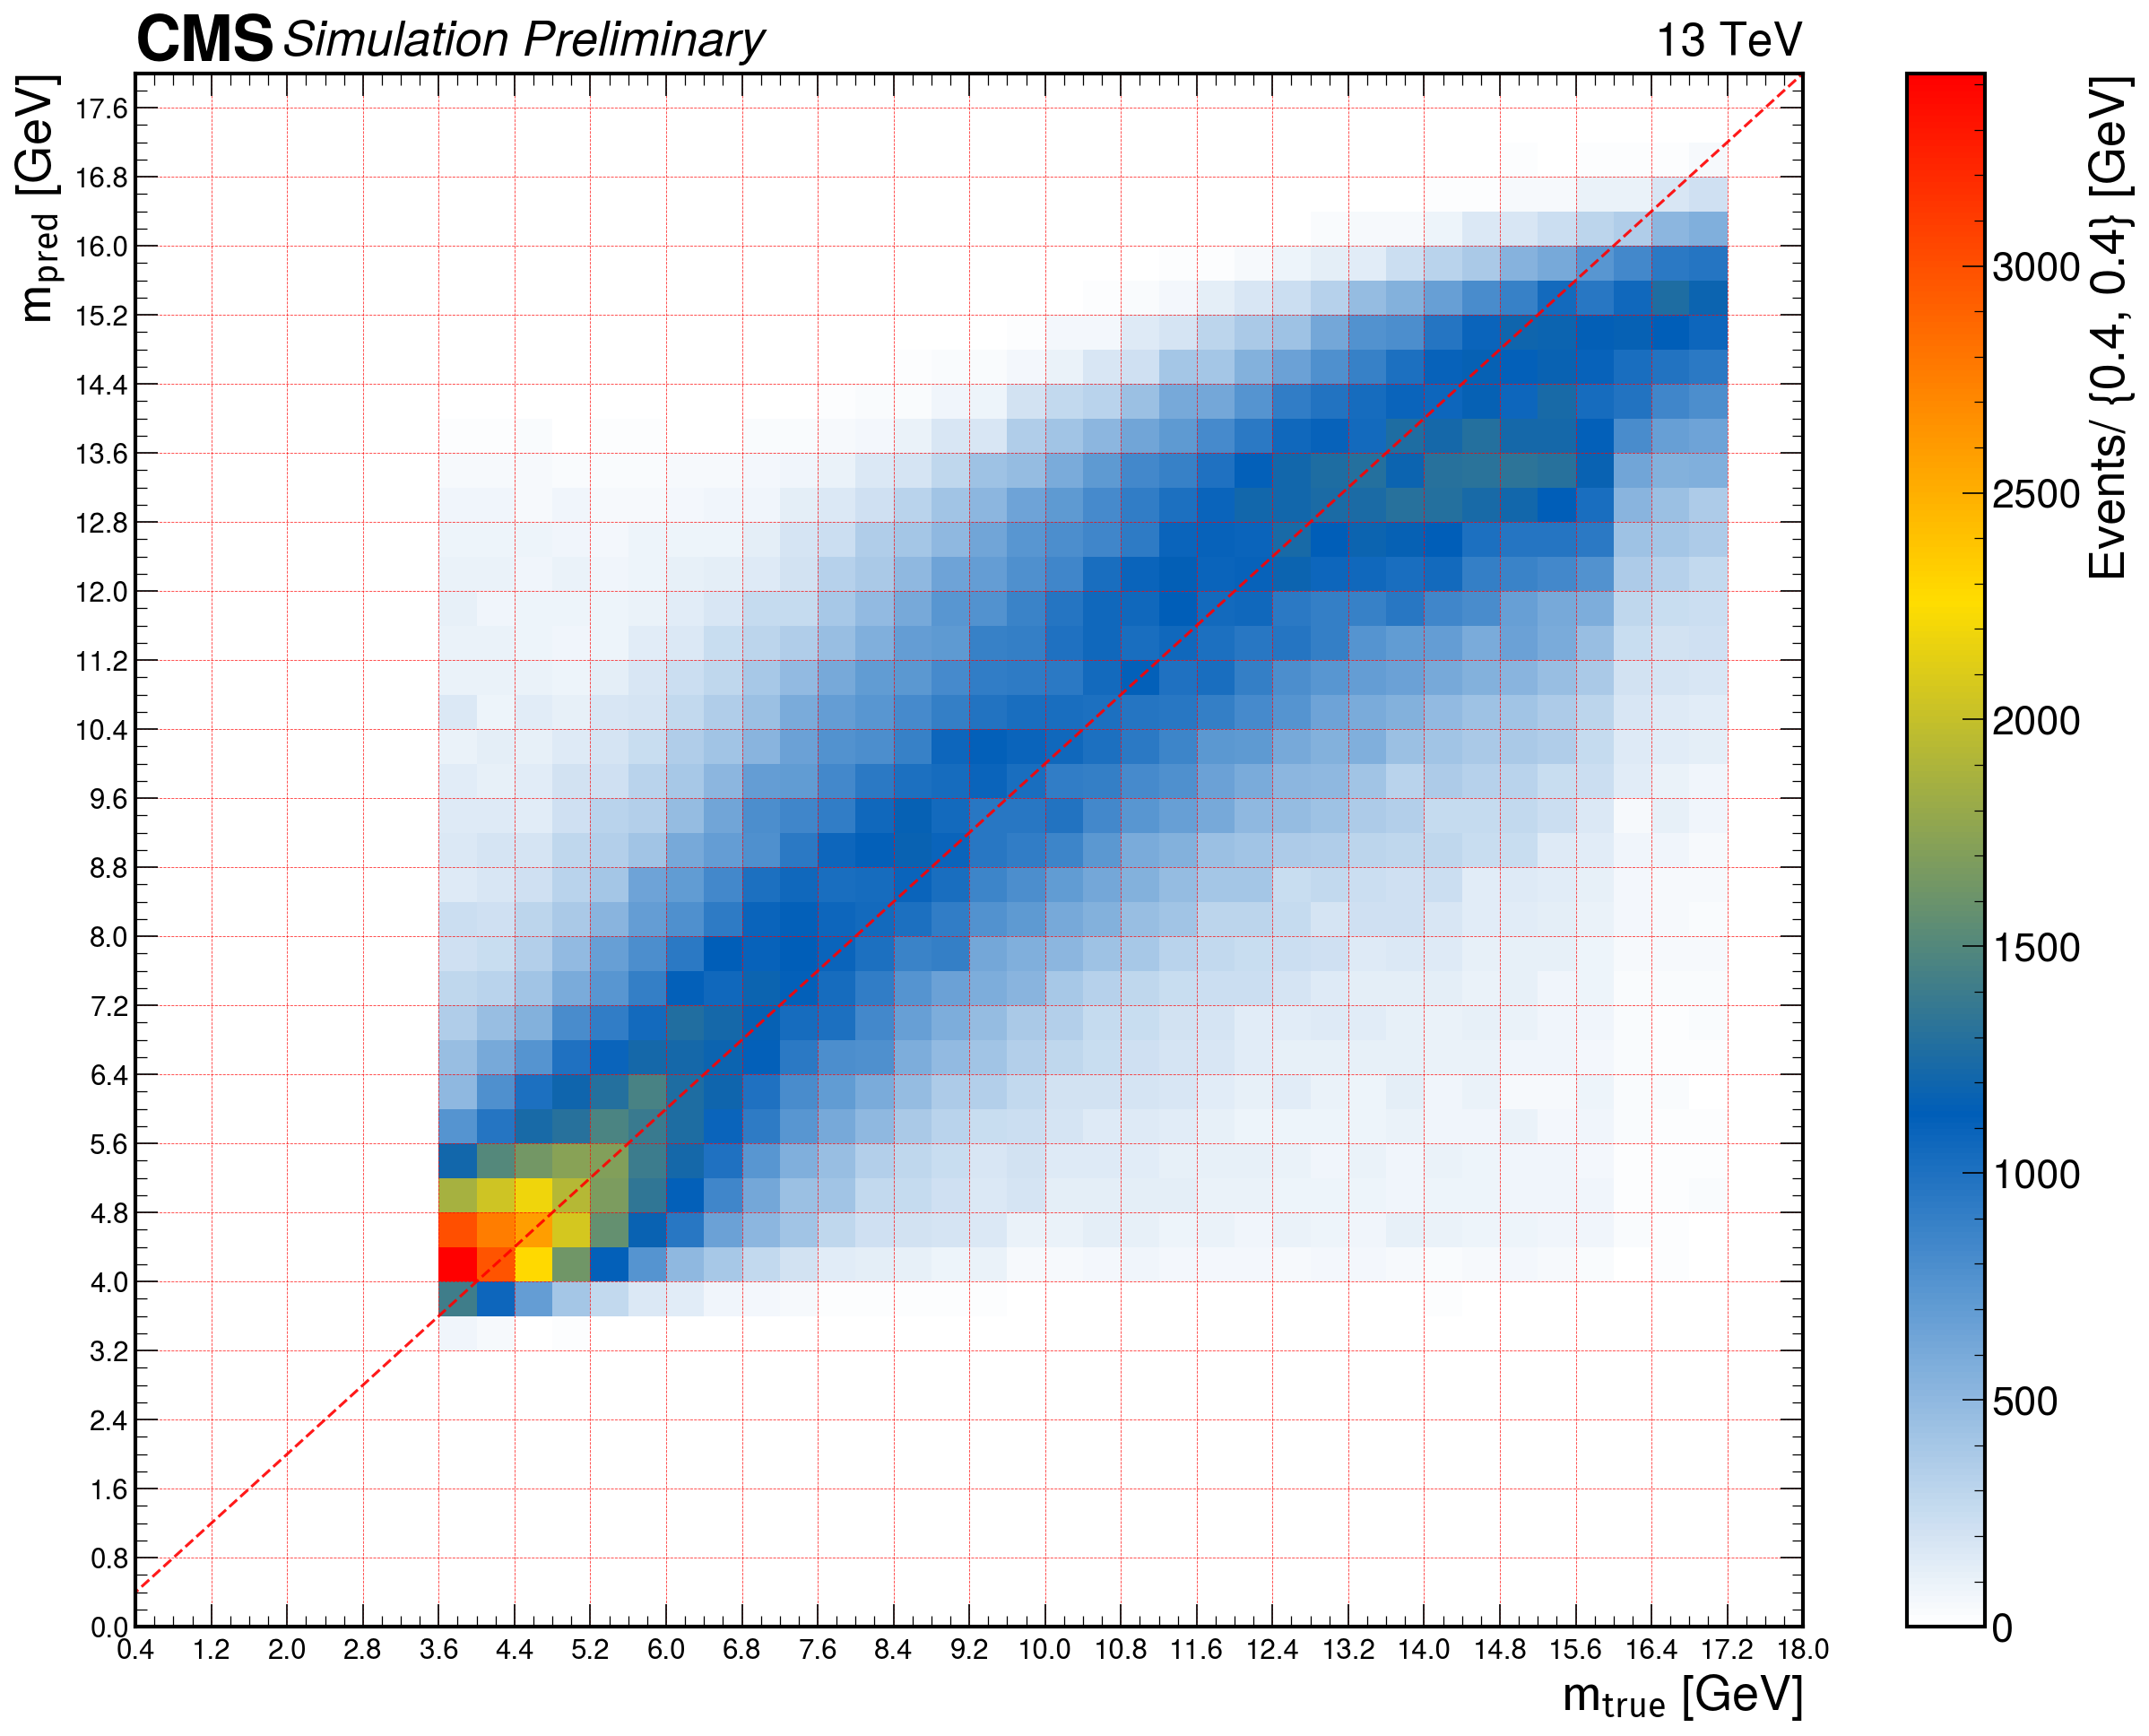

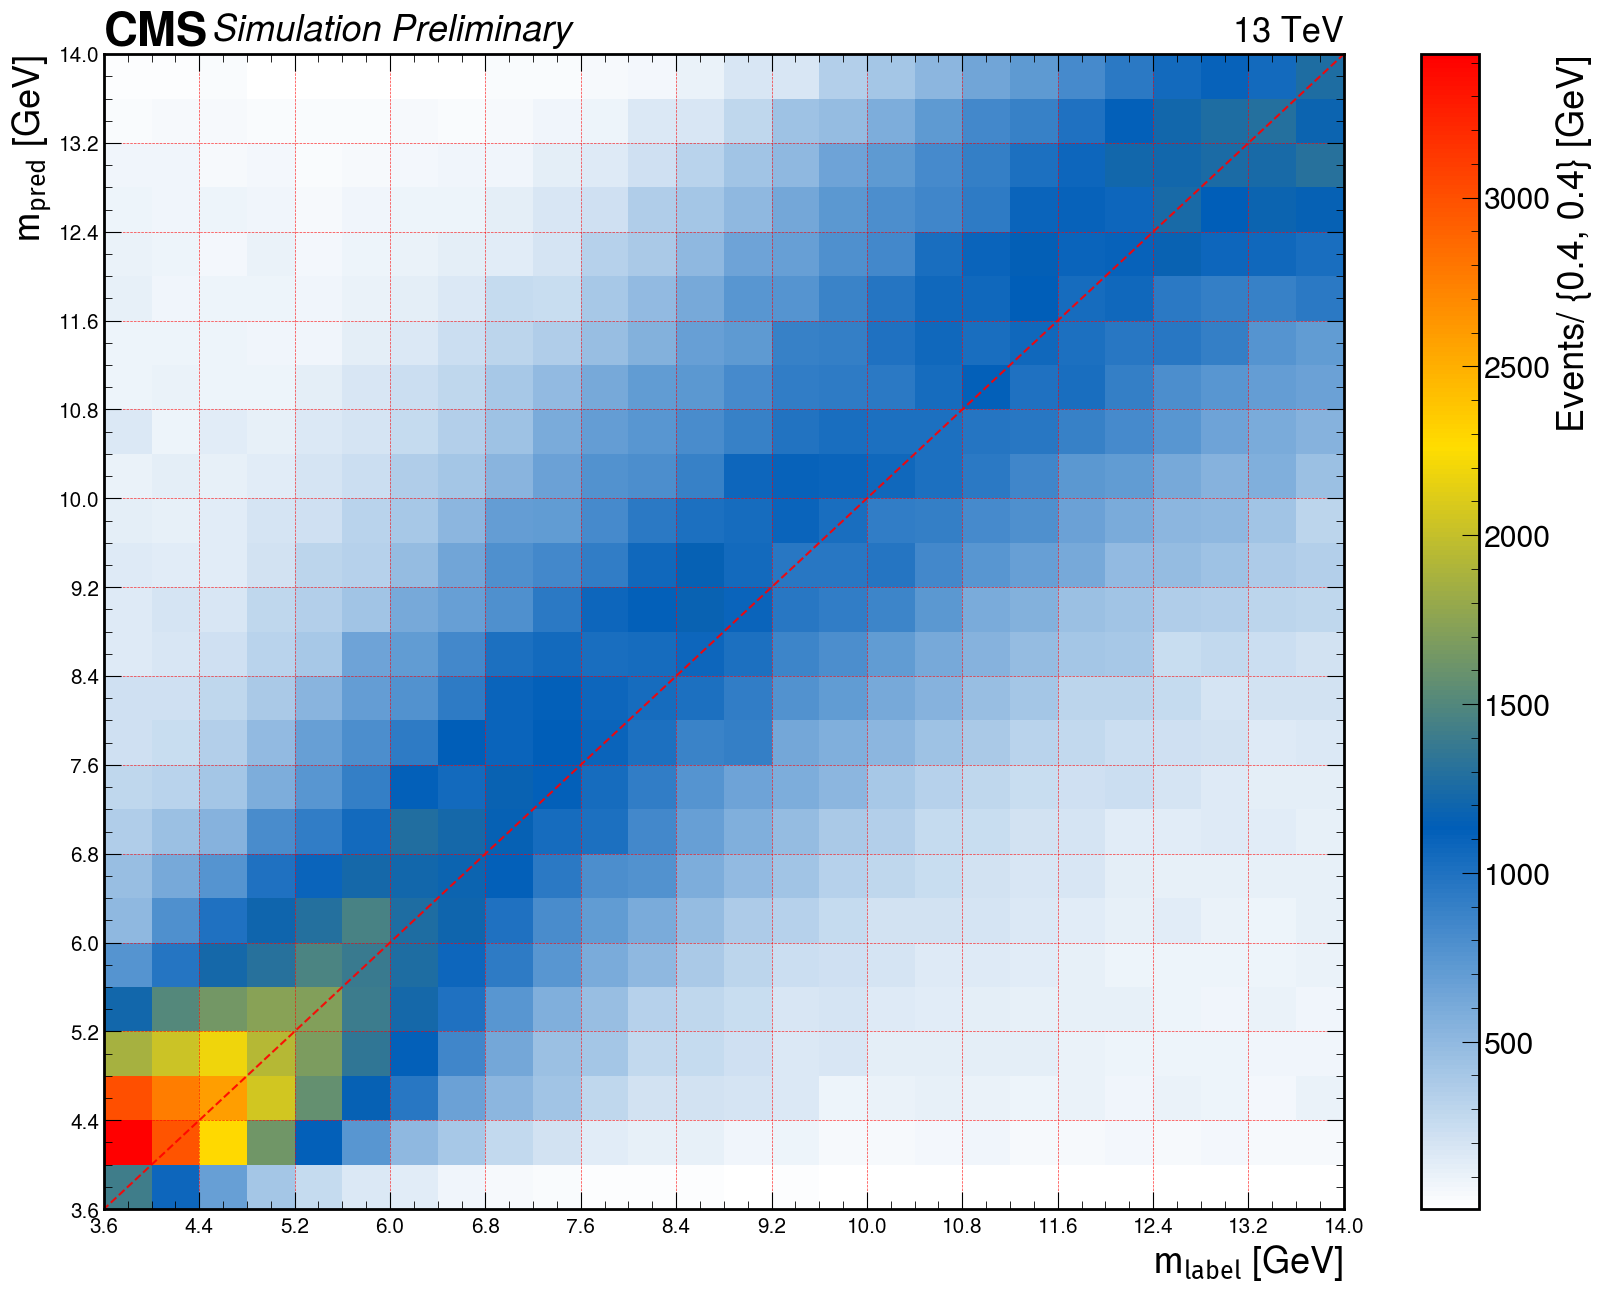

In [25]:
# 2D hist mteru and mpred
# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(3.6, 14.1, .8),size=15)
plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

In [26]:
####. mass_trainer_aToTauTau_m1p2To17p2_v2_40%Unpy_5ch

In [27]:
local='/home/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_50%Unpy_5ch/INFERENCE_DATA/5_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_40%Unphy_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from0_ntrain4840448_nval504832_run0/'
rhFileList = '%s/*.pkl'%(local)
paths = glob.glob(rhFileList)
assert len(paths) > 0
print(f"{len(paths)} files found")

15 files found


In [28]:
epoch=15
data_file = paths[epoch-1]
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()
m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
mae_ = data["mae"]
mre_ = data["mre"]

loaded data file ------>  /home/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_50%Unpy_5ch/INFERENCE_DATA/5_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_40%Unphy_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from0_ntrain4840448_nval504832_run0/epoch15_val_pseudoscalar_mae1.9375_inference_data.pkl


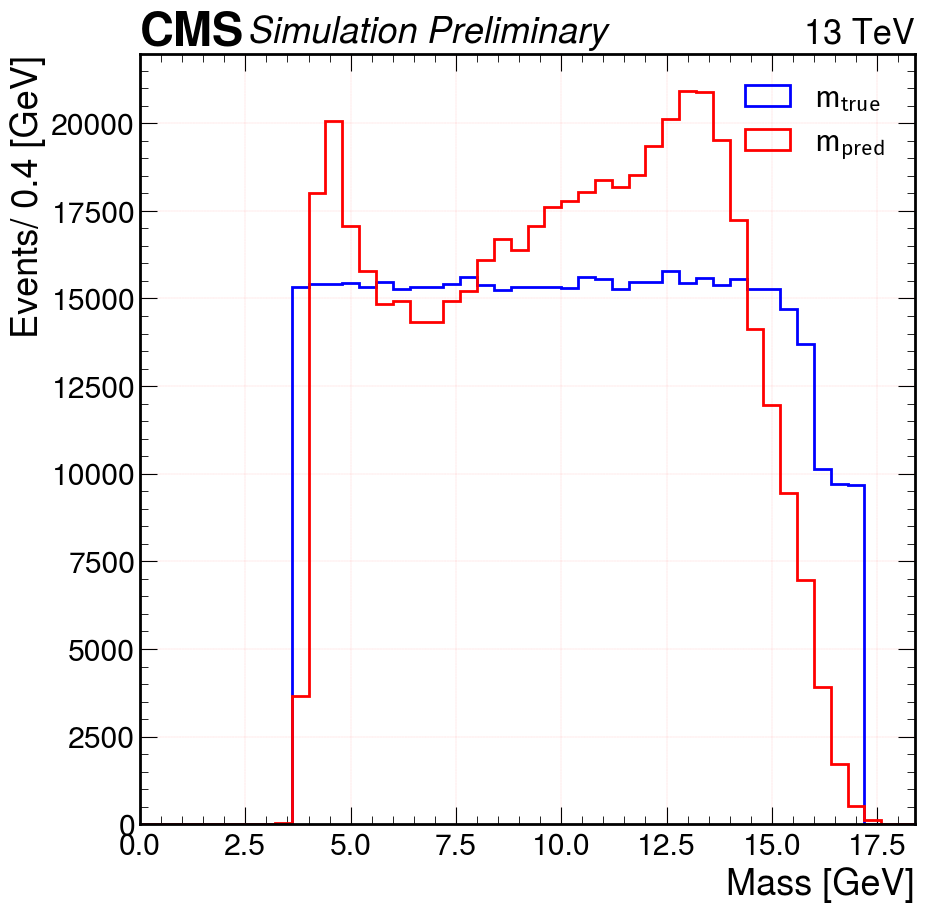

In [29]:
# Check 1D m_pred
# Extebded version
m0_min = 1.2
m0_max = 17.2
bin_size = 0.4
fig, ax = plt.subplots()
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
# plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# # Truncated version
# fig, ax = plt.subplots(figsize=(20,20))
# plt.hist(m_true_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
# plt.hist(m_pred_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
# plt.xlim(m0_min-bin_size,m0_max+bin_size)
# plt.xticks(np.arange(m0_min,m0_max+bin_size,bin_size),size=15)
# plt.grid(color='r', linestyle='--', linewidth=.1)
# plt.xlabel('Mass [GeV]')
# plt.ylabel('Events/ 0.4 [GeV]' )
# # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses', size=25)
# plt.legend(loc='upper right')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# # plt.savefig('%s/%d_mtru_mpred_hist_truncate.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
# plt.show()

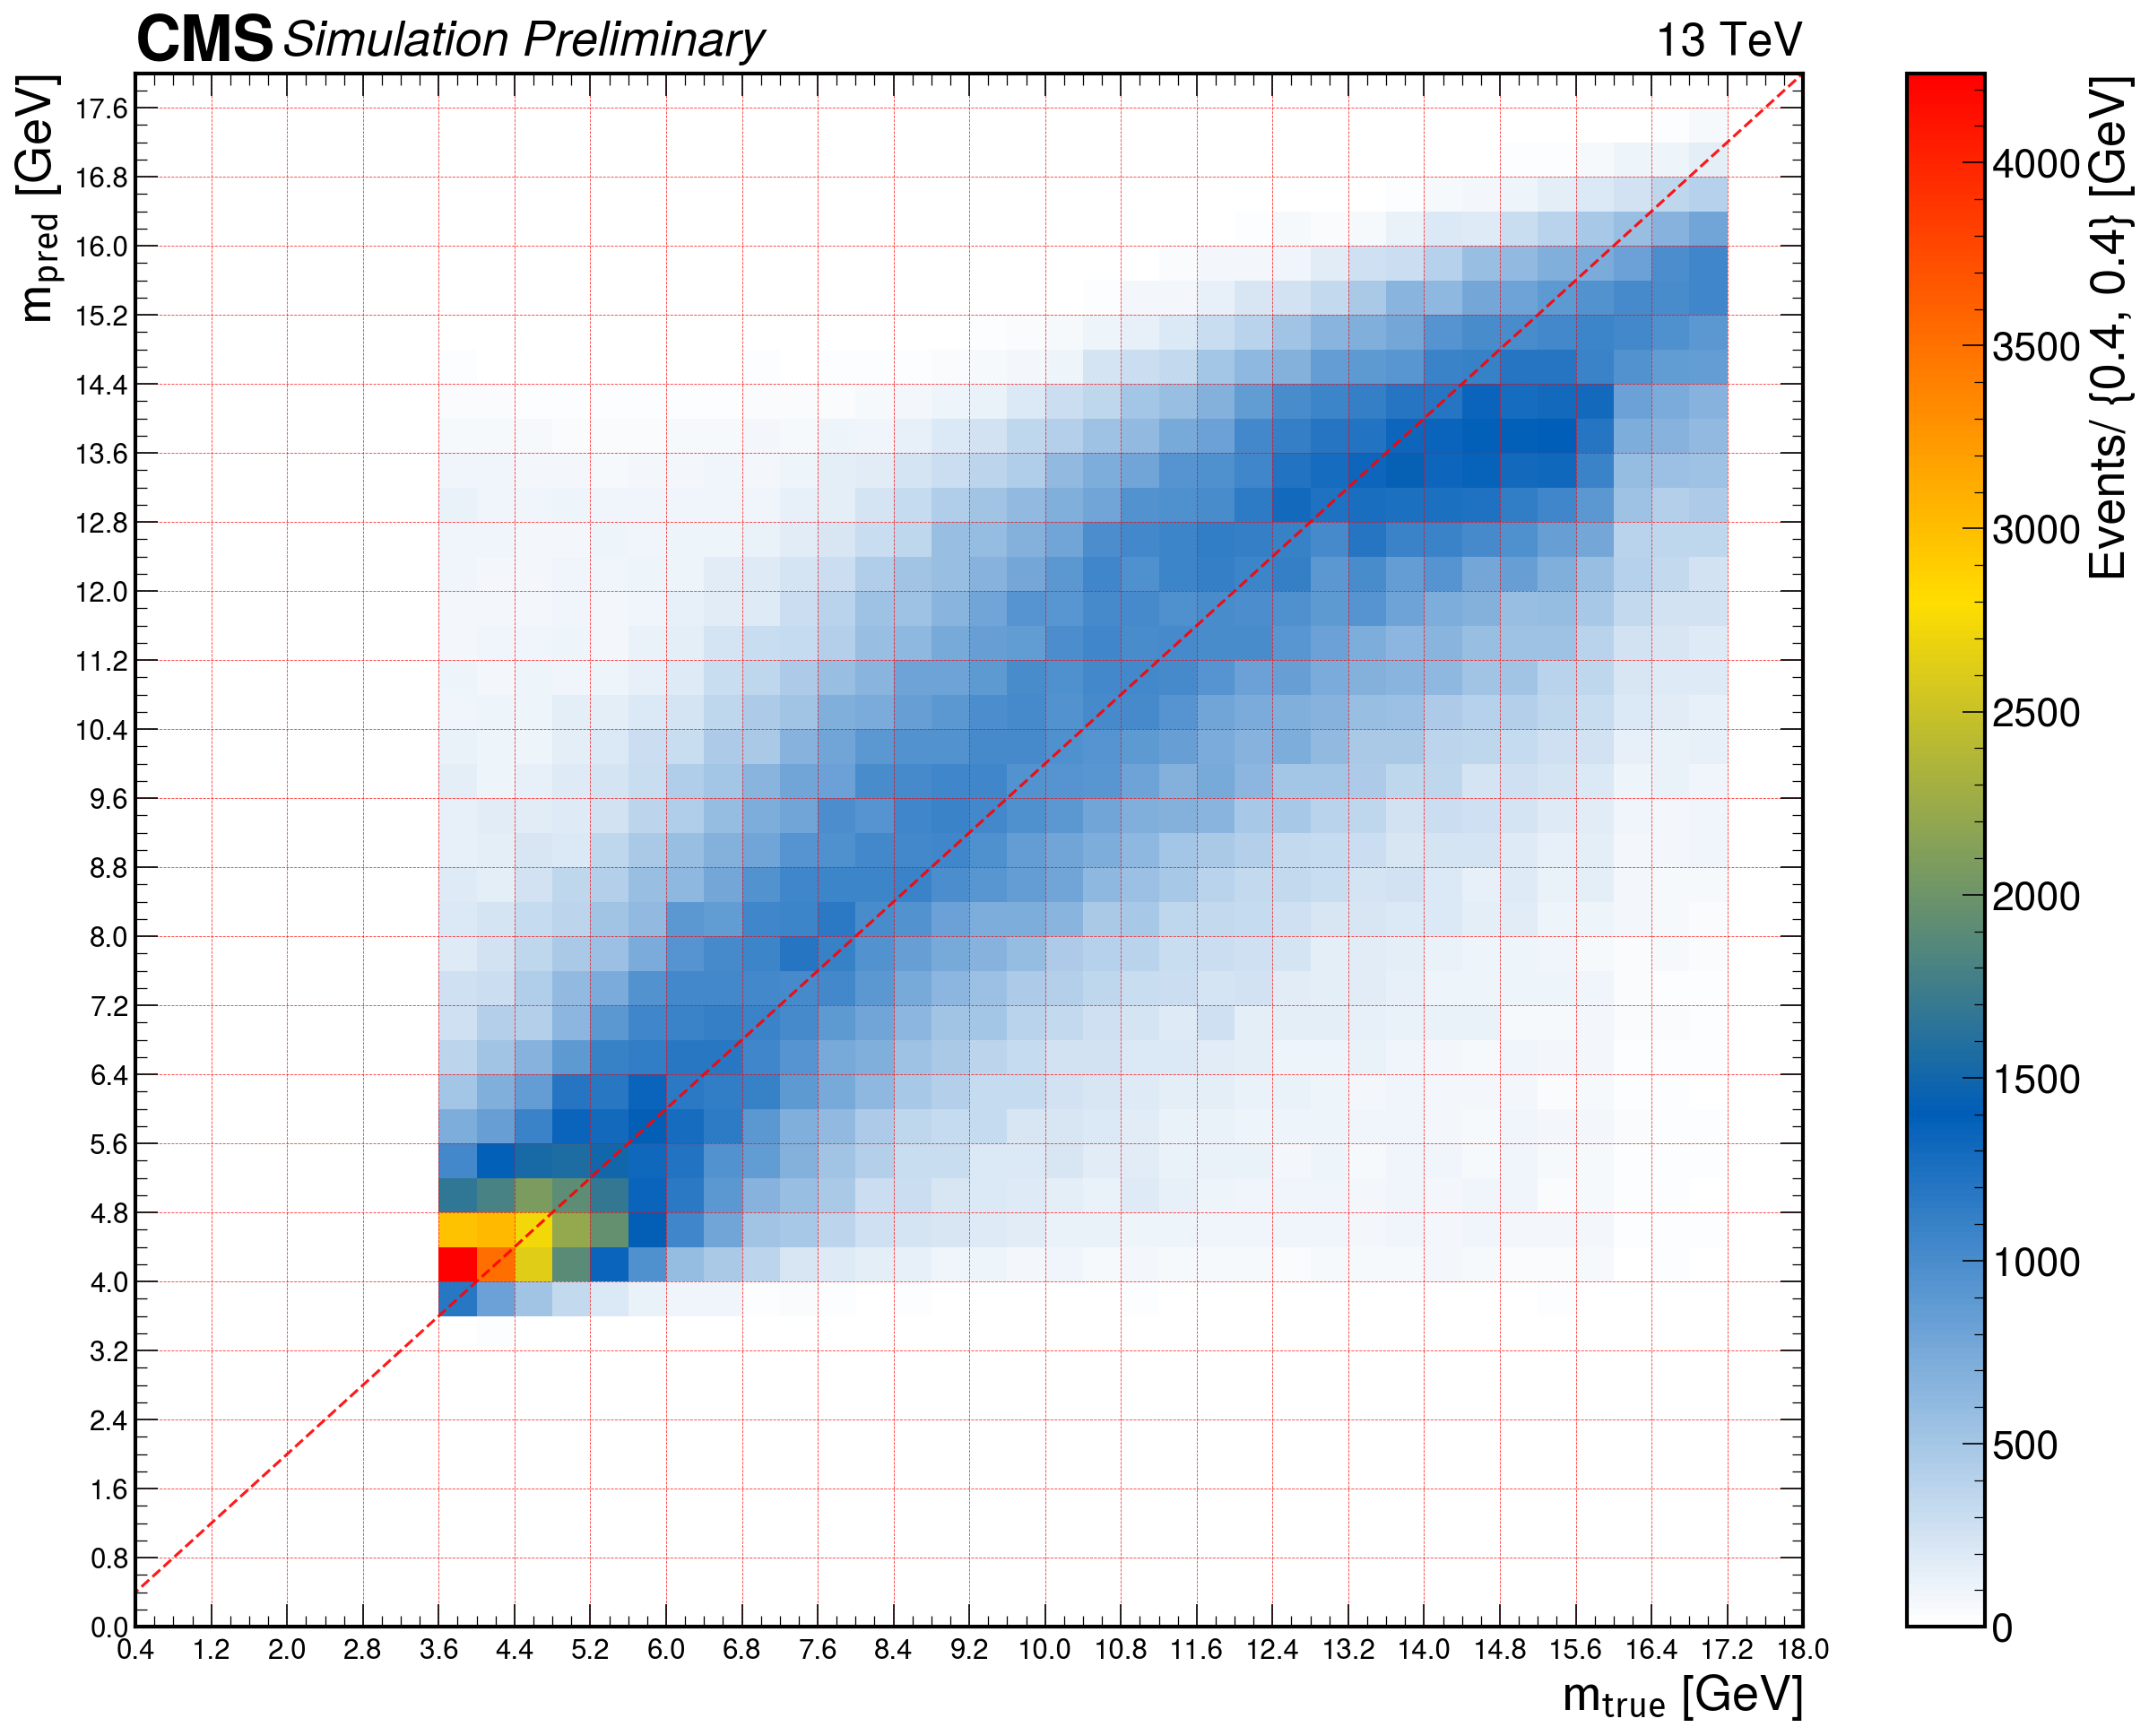

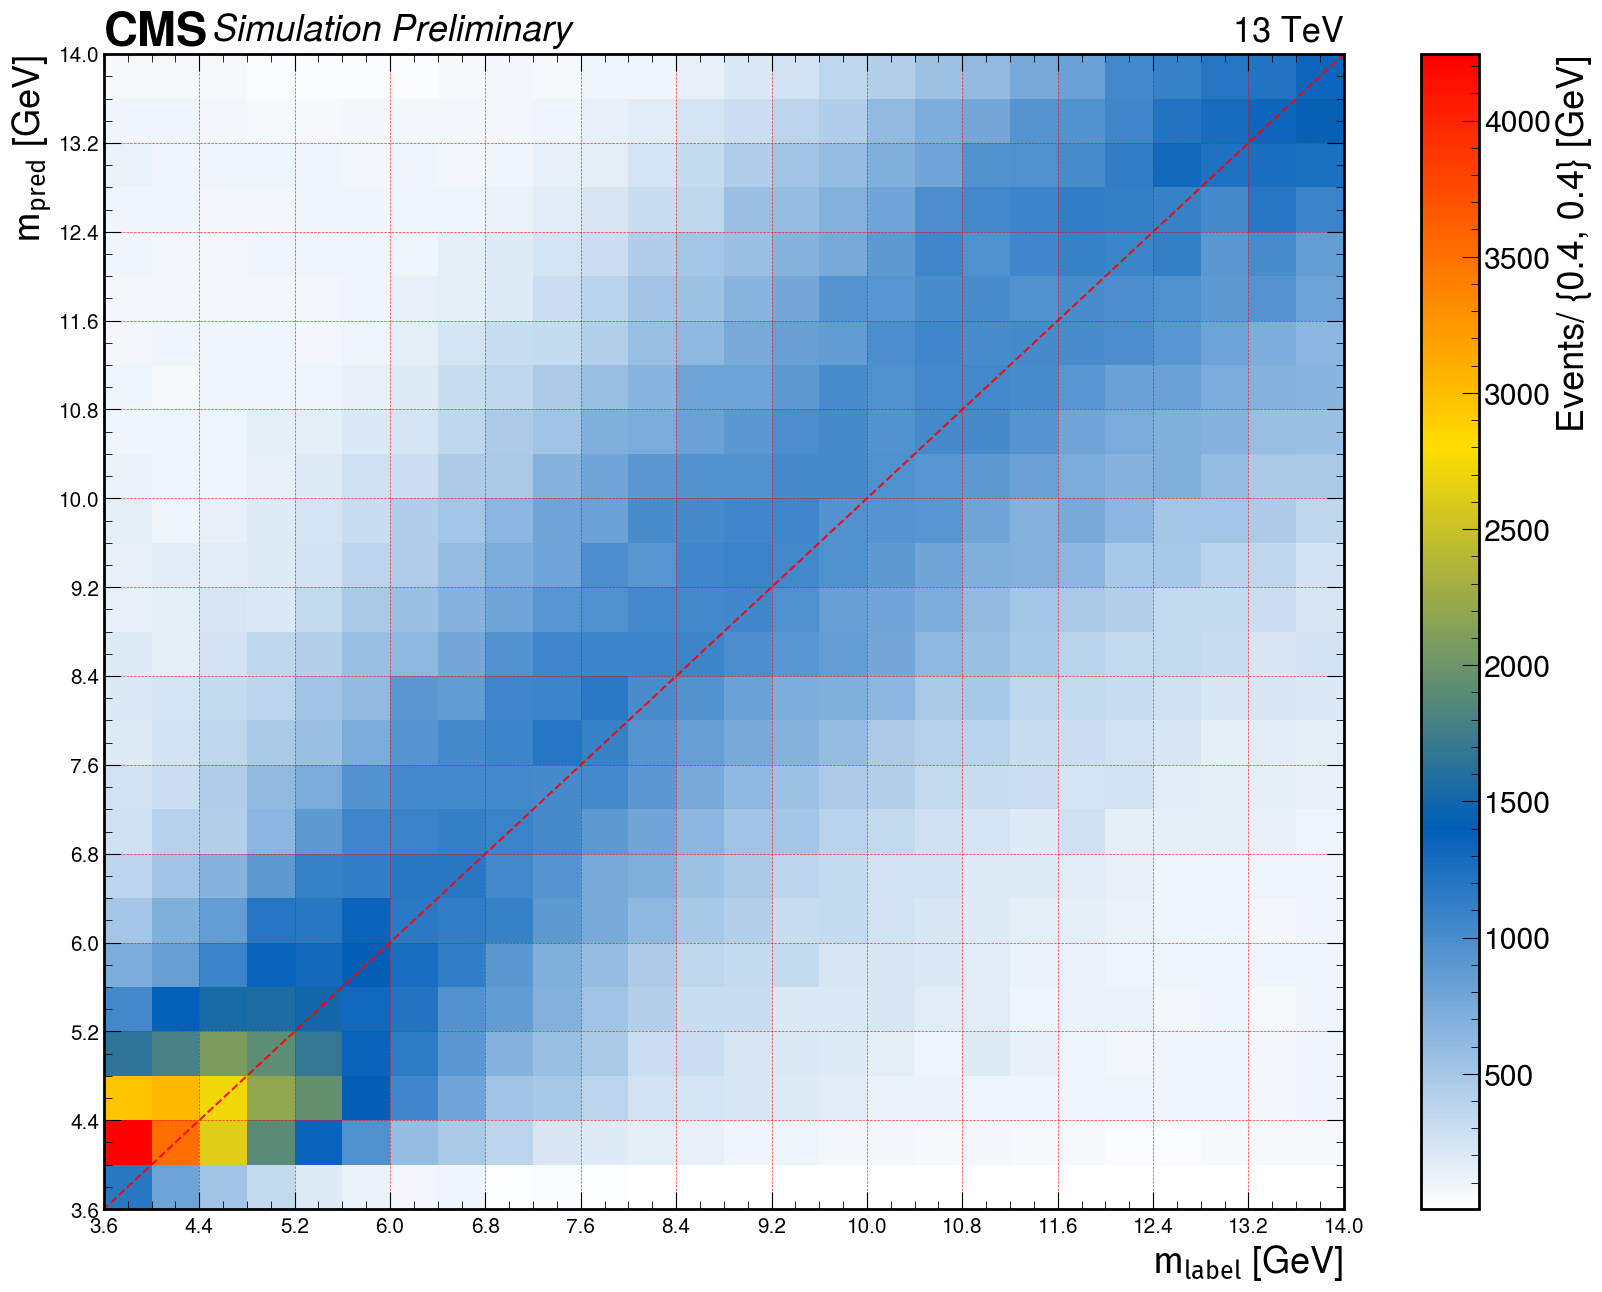

In [30]:
# 2D hist mteru and mpred
# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(3.6, 14.1, .8),size=15)
plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

In [31]:
####. mass_trainer_aToTauTau_m1p2To17p2_v2_40%Unpy_13ch

In [32]:


local='/home/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_50%Unpy_13ch/INFERENCE_DATA/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_40%Unphy_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from0_ntrain4840448_nval504832_run0/'
rhFileList = '%s/*.pkl'%(local)
paths = glob.glob(rhFileList)
assert len(paths) > 0
print(f"{len(paths)} files found")





9 files found


In [36]:

epoch=9
data_file = paths[epoch-1]
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()
m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
mae_ = data["mae"]
mre_ = data["mre"]

loaded data file ------>  /home/bbbam/mass_trainer_aToTauTau_m1p2To17p2_v2_50%Unpy_13ch/INFERENCE_DATA/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_40%Unphy_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from0_ntrain4840448_nval504832_run0/epoch9_val_pseudoscalar_mae1.9014_inference_data.pkl


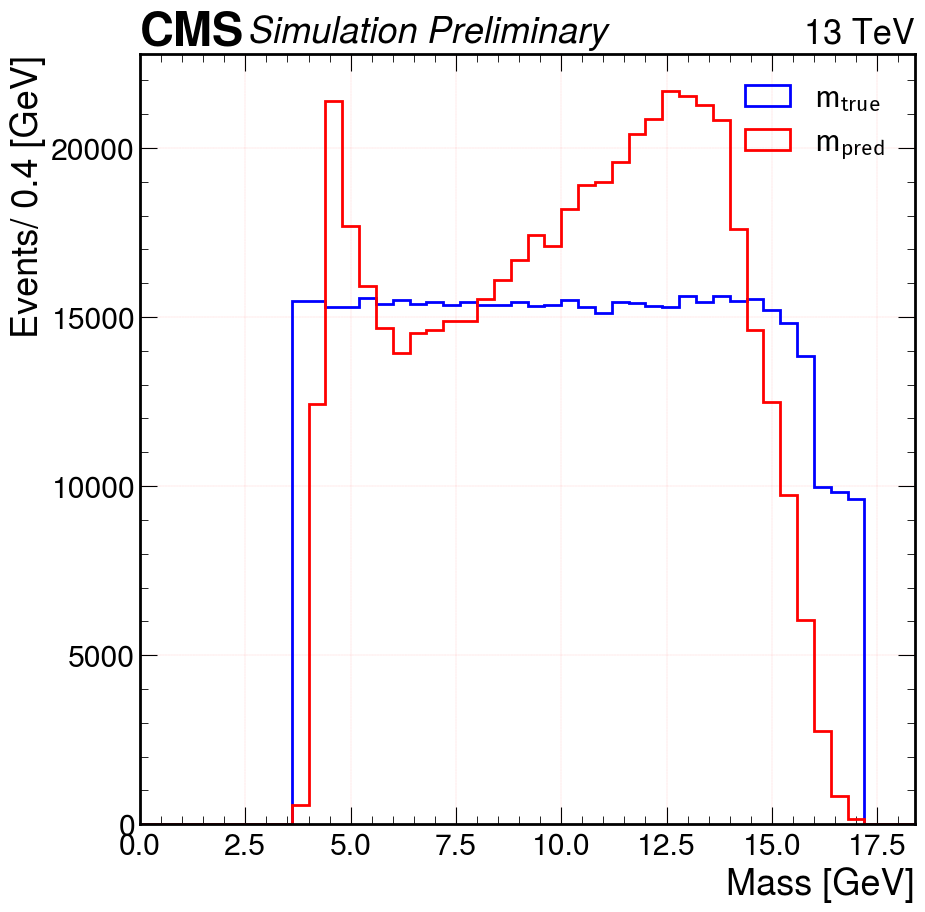

In [37]:
# Check 1D m_pred
# Extebded version
m0_min = 1.2
m0_max = 17.2
bin_size = 0.4
fig, ax = plt.subplots()
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
# plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()
# # Truncated version
# fig, ax = plt.subplots(figsize=(20,20))
# plt.hist(m_true_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
# plt.hist(m_pred_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
# plt.xlim(m0_min-bin_size,m0_max+bin_size)
# plt.xticks(np.arange(m0_min,m0_max+bin_size,bin_size),size=15)
# plt.grid(color='r', linestyle='--', linewidth=.1)
# plt.xlabel('Mass [GeV]')
# plt.ylabel('Events/ 0.4 [GeV]' )
# # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses', size=25)
# plt.legend(loc='upper right')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# # plt.savefig('%s/%d_mtru_mpred_hist_truncate.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
# plt.show()


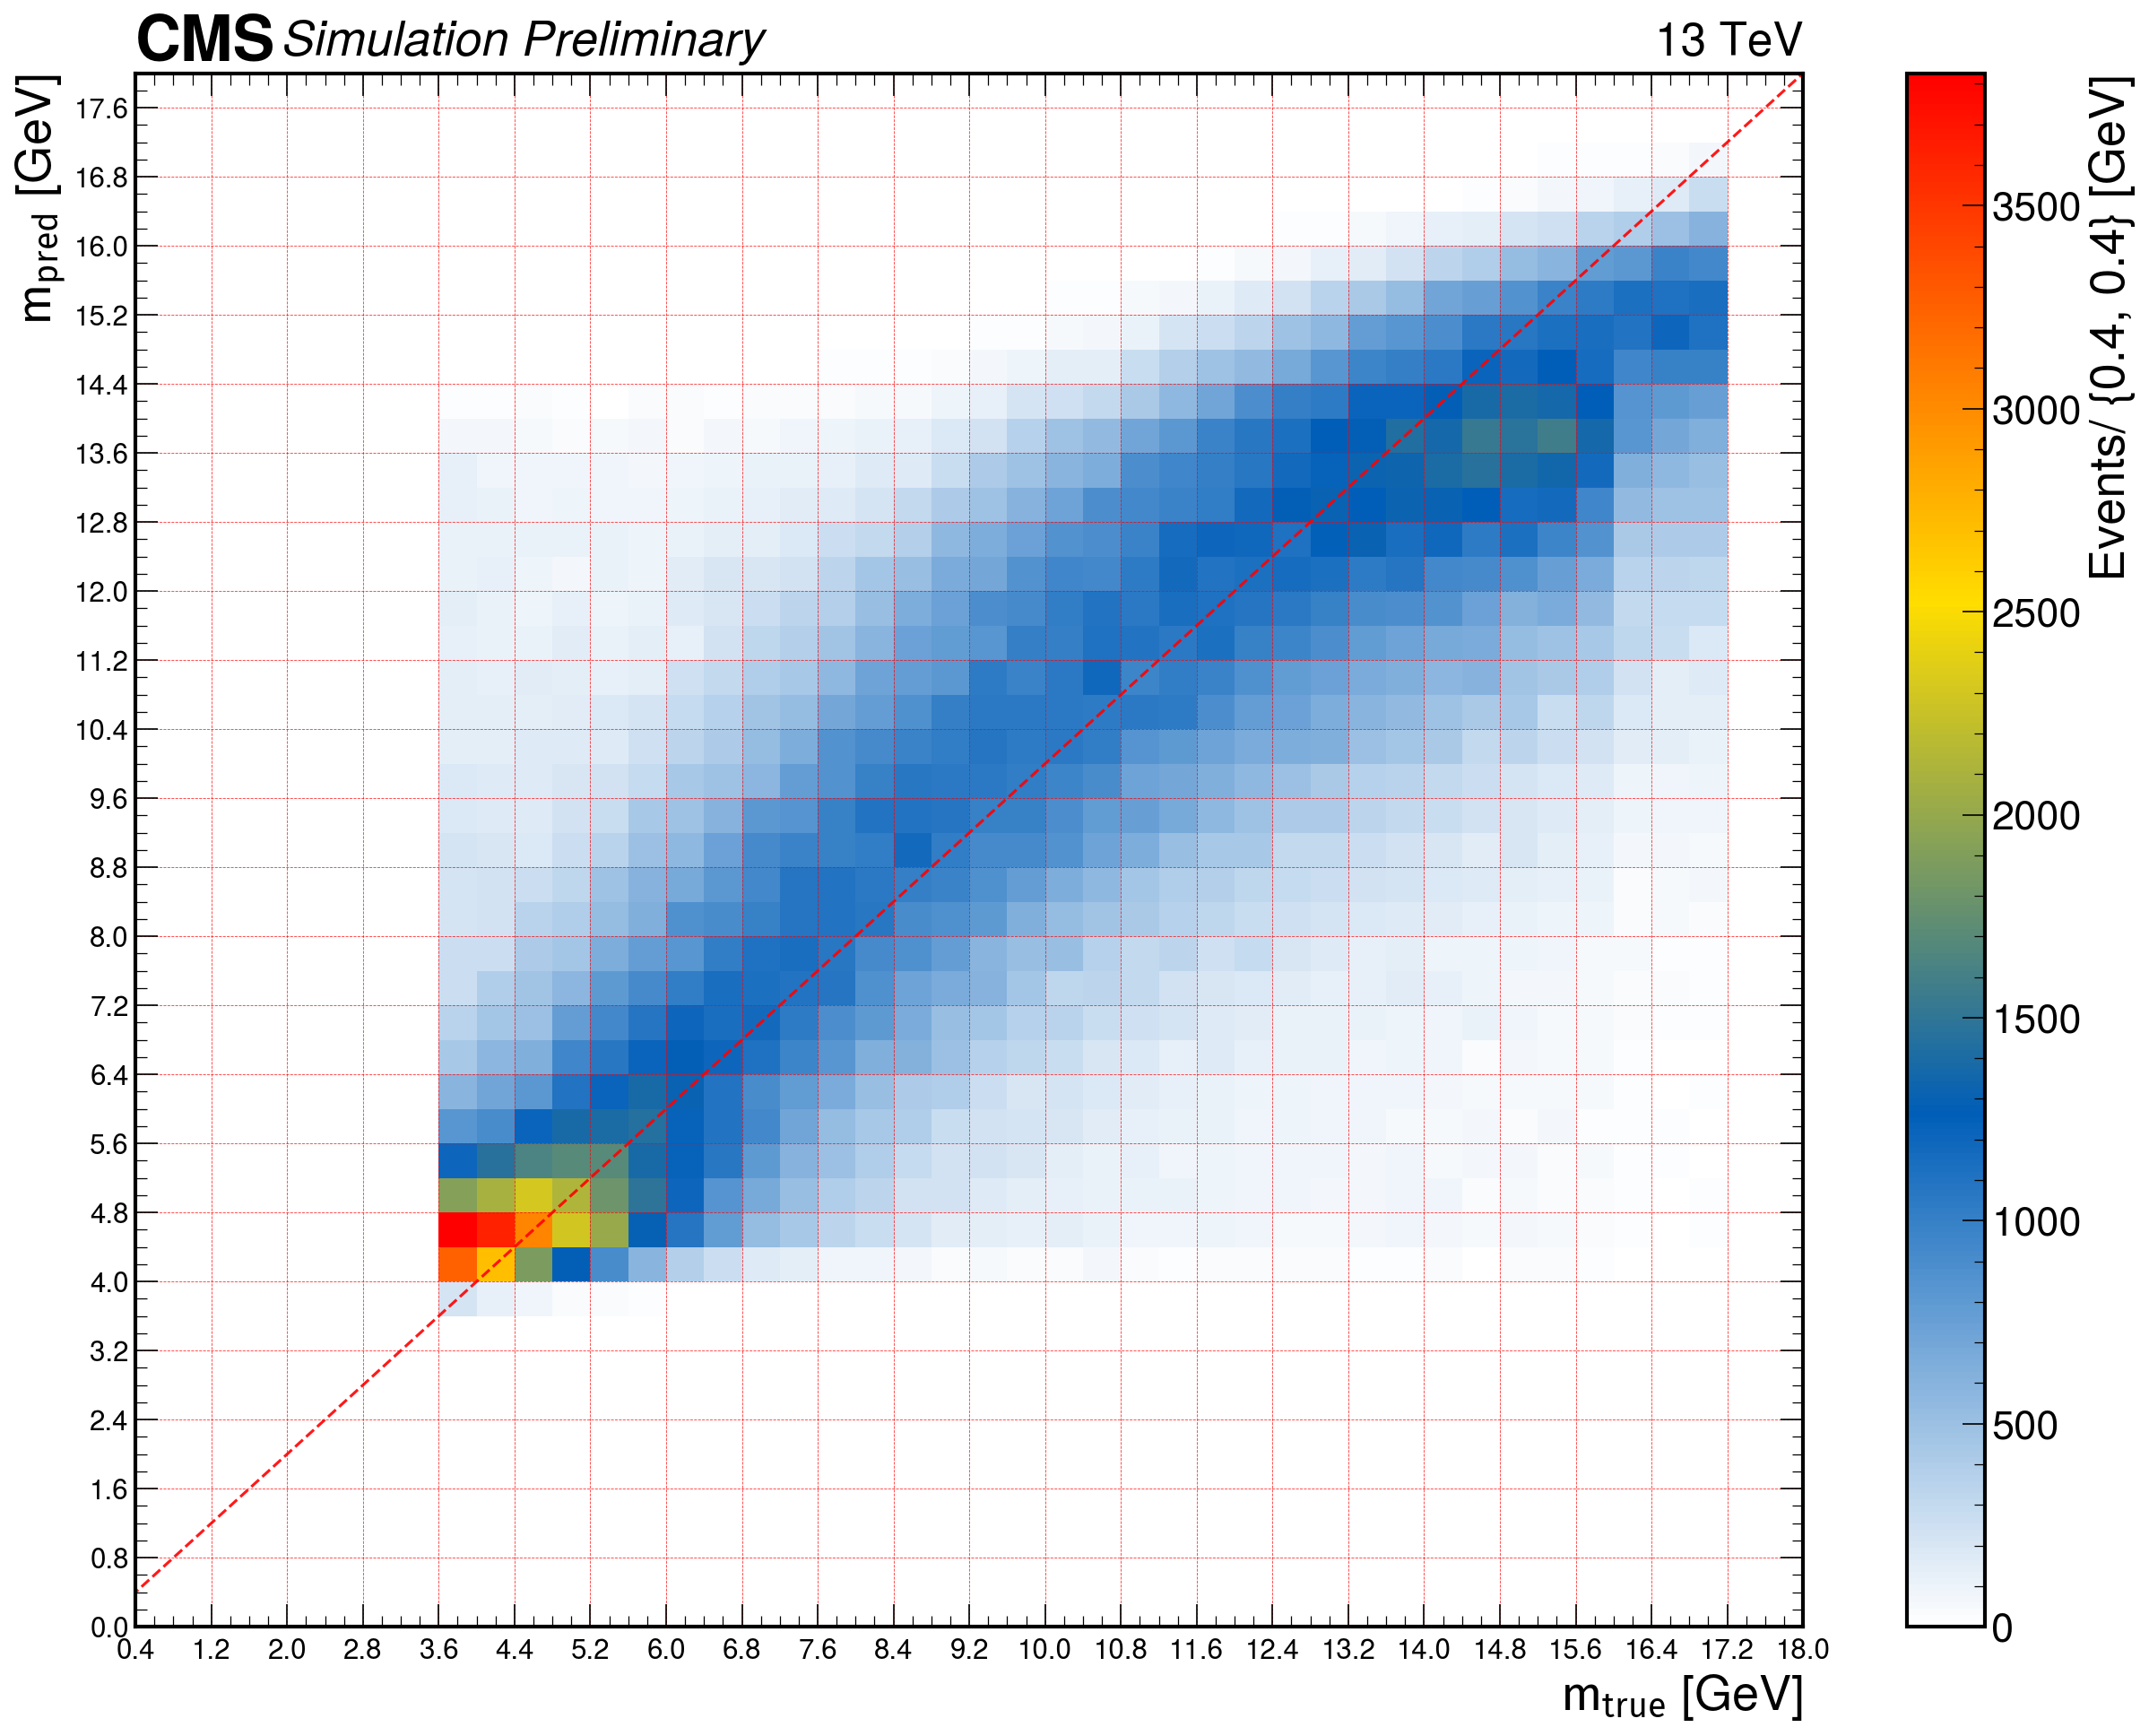

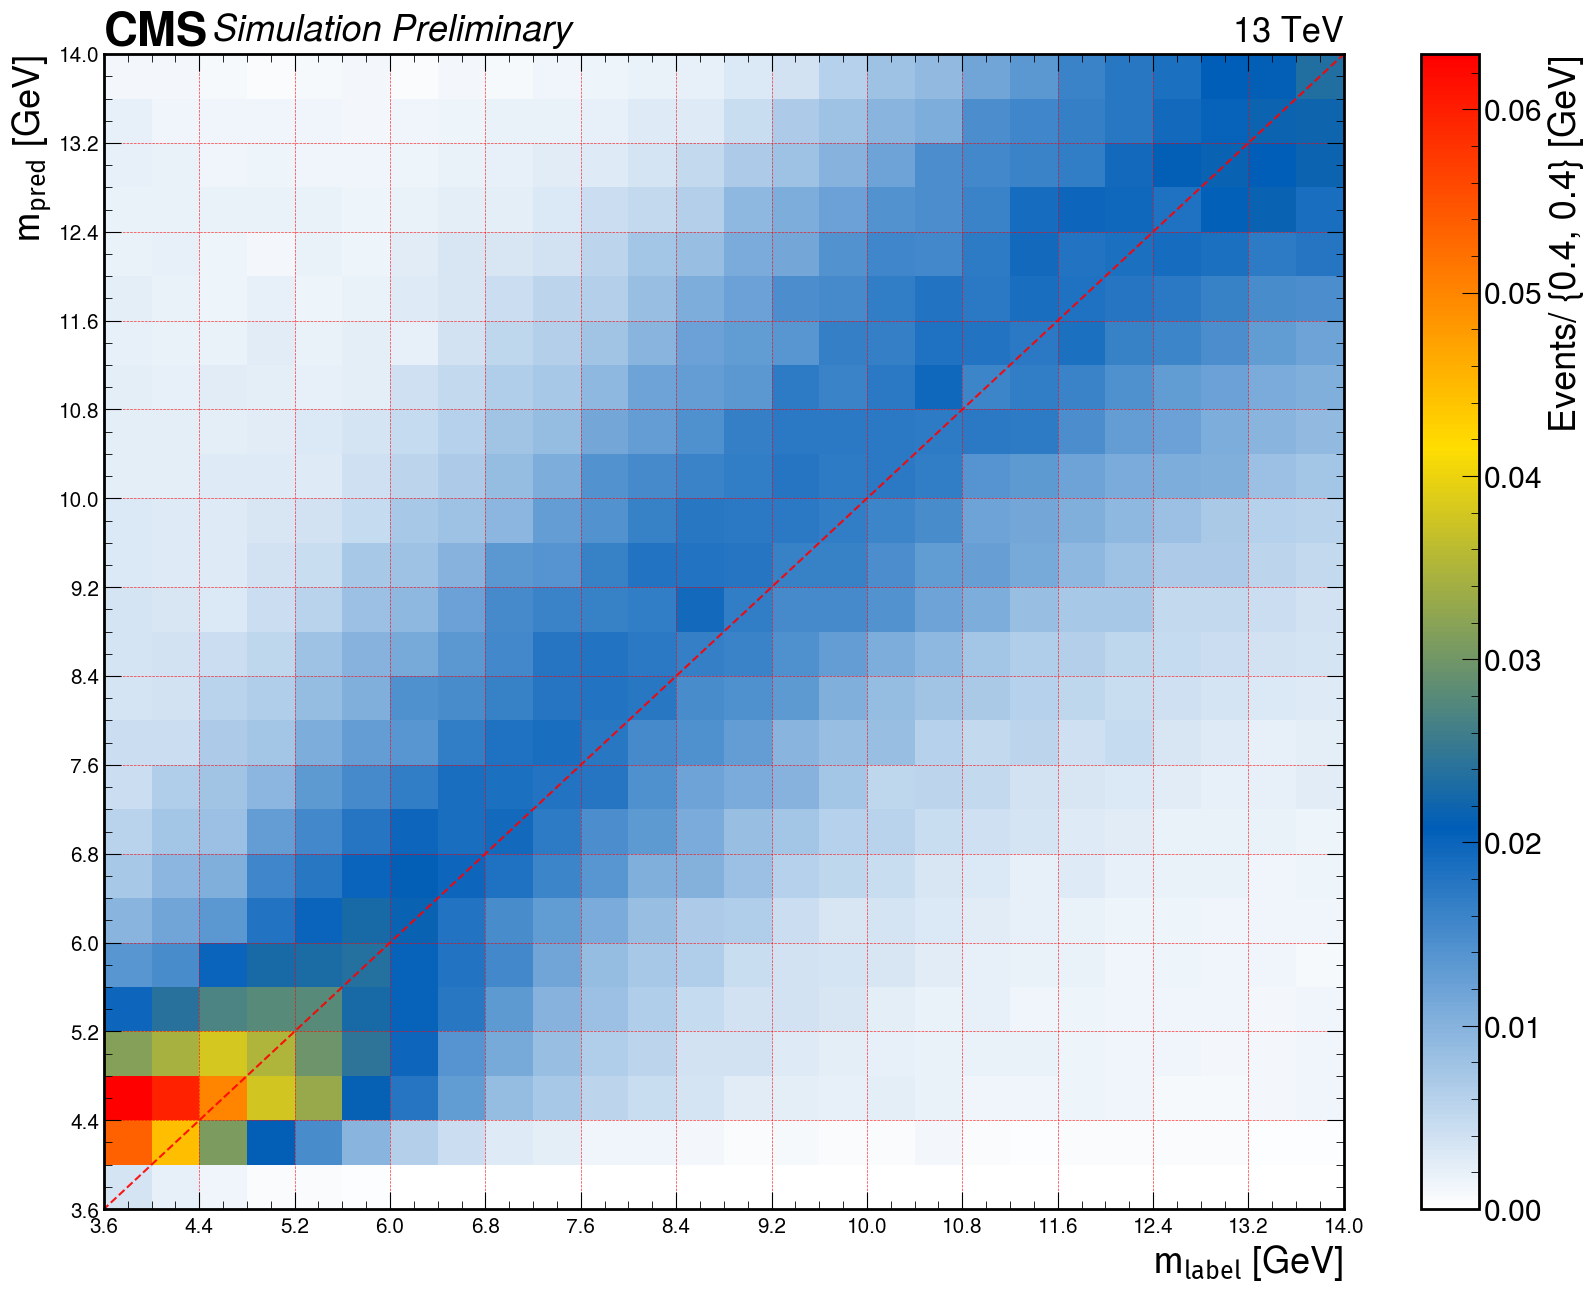

In [39]:
# 2D hist mteru and mpred
# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap,density=1)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(3.6, 14.1, .8),size=15)
plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

In [40]:

!ls

atom
fashion_mnist
jupy.sh
mass_reg_plot_for_proposal.ipynb
mass_regression_plots_all_model_test.ipynb
mass_regression_plots-Copy1.ipynb
mass_regression_plots.ipynb
mass_regression_using_diff_models.ipynb
mass_regression_using_v2.ipynb
mass_trainer_aToTauTau
mass_trainer_aToTauTau_diff_loss_function
mass_trainer_aToTauTau_from_davide_dataset
mass_trainer_aToTauTau_Full_unphysical_mass_N5p2To17p2_unphysical
mass_trainer_aToTauTau_Full_unphysical_mass_N5p2To17p2_unphysical_huber
mass_trainer_aToTauTau_Full_unphysical_mass_range
mass_trainer_aToTauTau_Full_unphysical_mass_range_huber
mass_trainer_aToTauTau_m0To17p2_unphysical_over_populated
mass_trainer_aToTauTau_m1p2To14_unphysical_over_populated_less_data_lowerUnPhysical_range
mass_trainer_aToTauTau_m1p2To17p2_all_unpy_more_upper
mass_trainer_aToTauTau_m1p2To17p2_less_unphysical
mass_trainer_aToTauTau_m1p2To17p2_less_unphysical_newModel_noBN
mass_trainer_aToTauTau_m1p2To17p2_less_unphysical_only_2files_newModel_noBN
mass_trainer_aToTauT

In [41]:
!pwd

/home/bbbam
